# Integrantes

### ASIGNATURA: Machine Learning

### NOMBRE PROYECTO: Banco Monopoly

### FECHA: 04-07-2023

### NOMBRE INTEGRANTES:
- Jair Molina
- Leandro Soto
- Jorge Carmona

# Contexto


Contexto: El banco "Monopoly" es una reconocida institución financiera que ha estado operando en Chile durante muchos años, brindando servicios a sus clientes. Sin embargo, recientemente ha sido adquirido por un banco con capitales extranjeros llamado "Dormammu". Con el objetivo de comprender el comportamiento de los clientes del banco Monopoly y desarrollar una estrategia efectiva para abordar este nuevo mercado, los ingenieros de Dormammu han llevado a cabo estudios exhaustivos utilizando una base de datos proporcionada por el banco Monopoly.

# Carga de Librerias y Datos

In [ ]:
# Cargar librerias
import numpy as np
import math as mt
import pandas as pd

#import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt

#from geopandas.tools import geocode
from IPython.display import clear_output
from IPython.display import display, HTML
from statistics import mode, multimode
import statistics


from sklearn.feature_selection import SelectKBest,chi2,f_regression

#Modelos
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import svm

#Metricas
from sklearn.metrics import roc_auc_score, recall_score, classification_report, confusion_matrix,precision_score,f1_score,accuracy_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from warnings import simplefilter
from collections import Counter
#Cluster
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

clear_output()

In [ ]:
!wget https://www.dropbox.com/s/afte3mi5iv9mk1p/Base_Clientes_Monopoly.csv
data = pd.read_csv("Base_Clientes_Monopoly.csv", sep=";")
clear_output()
print('-' * 50)
print('✓ Data Cargada ✓')
print('-' * 50)
print("El dataframe tiene {} filas y {} columnas".format(data.shape[0], data.shape[1]))
print('-' * 50)

--------------------------------------------------
✓ Data Cargada ✓
--------------------------------------------------
El dataframe tiene 51124 filas y 574 columnas
--------------------------------------------------


In [ ]:
null_counts = data.isnull().sum()
total_null_count = null_counts.sum()
#descriptions = []
display(HTML(f'<font color="black"><b><font size="2"> La  total de valorcantidades nulos en columnas con nulos es: {total_null_count}</font></b></font>'))

null_counts_filtered = null_counts
dtypes_filtered = data[null_counts_filtered.index].dtypes
result = pd.concat([null_counts_filtered, dtypes_filtered], axis=1)
result.columns = ['<span style="color:red;font-weight:bold;">Valores Nulos</span>',
                  '<span style="color:red;font-weight:bold;">Tipo de Dato</span>']

#result['<span style="color:red;font-weight:bold;"> Descripcion</span>'] = descriptions[:len(result)]

display(HTML(result.to_html(escape=False)))


,Valores Nulos,Tipo de Dato
Id,0,int64
Subsegmento,0,int64
Sexo,1,object
Region,53,float64
Edad,0,int64
Renta,13365,object
Antiguedad,0,int64
Internauta,0,int64
Adicional,0,int64
Dualidad,0,int64


In [ ]:
valores_unicos_Target = data["target"].unique()

print(valores_unicos_Target)

[0 1]


# LIMPIEZA

In [ ]:
# Lista de columnas que deseas convertir a tipo 'object'
columns_to_convert = ['FlgAct', 'FlgActAI', 'FlgActAN', 'FlgActCCOT', 'FlgActCCPC', 'FlgActCI', 'FlgActCN', 'FlgActCOL', 'FlgActPAT']

for column in columns_to_convert:
    # Generar una lista de columnas correspondientes a los diferentes meses
    month_columns = [column + f'_T{i:02d}' for i in range(12, 0, -1)]
    # Seleccionar las columnas en el DataFrame y aplicar la conversión y sustitución de valores
    data[month_columns] = data[month_columns].fillna(3).astype(int)
    data[month_columns] = data[month_columns].replace({0: 'NO', 1: 'SI', 3:'Sin Registro'})

In [ ]:
ncolumnas = 0
columns_to_convert3 = ['Fac', 'FacAI', 'FacAN', 'FacCCOT', 'FacCCPC', 'FacCI', 'FacCN', 'FacCOL',
                    'FacDebAtm', 'FacDebCom', 'FacPAT', 'Col','ColL1TE', 'Txs', 'TxsAI', 'TxsAN',
                    'TxsCCOT', 'TxsCCPC', 'TxsCI', 'TxsCN', 'TxsCOL', 'TxsCN', 'TxsCOL', 'TxsDebAtm',
                    'TxsDebCom', 'TxsPAT', 'UsoL1', 'UsoL2', 'UsoLI', 'PagoInt', 'PagoNac', 'ColL1T0',
                    'ColL2T0', 'ColL2AC', 'ColL2CC', 'ColMx', 'EeccNac']
#Recorremos las columnas
for column in columns_to_convert3:
#Generar una lista de columnas correspondientes a los diferentes meses
    month_columns = [column + f'_T{i:02d}' for i in range(12, 0, -1)]
    ncolumnas += 1
#Convertir la columna actual a tipo 'object'
    data[month_columns] = data[month_columns].astype(object)

#Reemplazar los valores 'nan' con NaN
    data[month_columns] = data[month_columns].replace('nan', np.nan)


    data[month_columns] = data[month_columns].fillna(-999)

print(f"El numero de columnas modificadas fue de {ncolumnas*12}")

El numero de columnas modificadas fue de 444


In [ ]:
for column in columns_to_convert3:
#Generar una lista de columnas correspondientes a los diferentes meses
    month_columns = [column + f'_T{i:02d}' for i in range(12, 0, -1)]

    for col in month_columns:
        data[col] = data[col].astype(str).str.replace(',', '.').astype(float)

In [ ]:
for column in columns_to_convert3:
#Generar una lista de columnas correspondientes a los diferentes meses
    month_columns = [column + f'_T{i:02d}' for i in range(12, 0, -1)]

    for col in month_columns:
#Convertir la columna actual a tipo 'int'
        data[col] = data[col].astype(int)

In [ ]:
columns_to_convert = ['EeccInt']

for column in columns_to_convert:
    # Generar una lista de columnas correspondientes a los diferentes meses
    month_columns = [column + f'_T{i:02d}' for i in range(12, 0, -1)]

    # Convertir la columna actual a tipo 'object'

    # Reemplazar los valores 'nan' con NaN
    data[month_columns] = data[month_columns].replace('nan', np.nan)

    # Llenar los valores NaN con 0
    data[month_columns] = data[month_columns].fillna(94587694857)


In [ ]:
for column in columns_to_convert:
    # Generar una lista de columnas correspondientes a los diferentes meses
    month_columns = [column + f'_T{i:02d}' for i in range(12, 0, -1)]

    for col in month_columns:
        data[col] = data[col].astype(str).str.replace(',', '.').astype(float)

In [ ]:
for column in columns_to_convert:
# Generar una lista de columnas correspondientes a los diferentes meses
    month_columns = [column + f'_T{i:02d}' for i in range(12, 0, -1)]

    for col in month_columns:
#Filtrar las filas que no contienen nulos en la columna actual
        data_filtered = data[data[col] != 94587694857]

#Calcular la mediana de la columna actual
        mediana = data_filtered[col].median()

#Convertir la columna actual a tipo 'int'
        data[col] = data[col].replace(94587694857, mediana)

In [ ]:
columns_to_convert = ['IndRev']

# Iterar sobre las columnas y convertirlas a tipo 'object'
for column in columns_to_convert:
    # Generar una lista de columnas correspondientes a los diferentes meses
    month_columns = [column + f'_T{i:02d}' for i in range(12, 0, -1)]

    # Convertir la columna actual a tipo 'object'

    # Reemplazar los valores 'nan' con NaN
    data[month_columns] = data[month_columns].replace('nan', np.nan)

    # Llenar los valores NaN con 0
    data[month_columns] = data[month_columns].fillna('Sin Registro')

In [ ]:
# Cambio de tipo de dato de Region
data['Region'] = pd.to_numeric(data['Region'], errors='coerce')
mask = pd.isna(data['Region'])
data.loc[mask, 'Region'] = np.nan
data['Region'] = data['Region'].astype('Int64')
data['Region'] = data['Region'].astype('object')

# Cambio de tipo de dato de CambioPin
data['CambioPin'] = pd.to_numeric(data['CambioPin'], errors='coerce')
mask = pd.isna(data['CambioPin'])
data.loc[mask, 'CambioPin'] = np.nan
data['CambioPin'] = data['CambioPin'].astype('Int64')

data['CUPO_L2'] = pd.to_numeric(data['CUPO_L2'], errors='coerce')
mask = pd.isna(data['CUPO_L2'])
data.loc[mask, 'CUPO_L2'] = np.nan
data['CUPO_L2'] = data['CUPO_L2'].astype('Int64')
data['CUPO_L2'] = data['CUPO_L2'].fillna(0)


data['CUPO_MX'] = pd.to_numeric(data['CUPO_MX'], errors='coerce')
mask = pd.isna(data['CUPO_MX'])
data.loc[mask, 'CUPO_MX'] = np.nan
data['CUPO_MX'] = data['CUPO_MX'].astype('Int64')
data['CUPO_MX'] = data['CUPO_MX'].fillna(0)


# Cambio de tipo de dato de Renta
data['Renta'] = pd.to_numeric(data['Renta'], errors='coerce')
data['Renta'] = data['Renta'].astype(float)
data['Renta'] = data['Renta'].astype('Int64')

clear_output()

print("El tipo de dato de la columna 'Region' es:", data['Region'].dtype)
print('Region ✓')
print("El tipo de dato de la columna 'CambioPin' es:", data['CambioPin'].dtype)
print('CambioPin ✓')
print("El tipo de dato de la columna 'Renta' es:", data['Renta'].dtype)
print('Renta ✓')
print("El tipo de dato de la columna 'CUPO_L2' es:", data['CUPO_L2'].dtype)
print('CUPO_L2 ✓')
print("El tipo de dato de la columna 'CUPO_MX' es:", data['CUPO_MX'].dtype)
print('CUPO_MX ✓')


El tipo de dato de la columna 'Region' es: object
Region ✓
El tipo de dato de la columna 'CambioPin' es: Int64
CambioPin ✓
El tipo de dato de la columna 'Renta' es: Int64
Renta ✓
El tipo de dato de la columna 'CUPO_L2' es: Int64
CUPO_L2 ✓
El tipo de dato de la columna 'CUPO_MX' es: Int64
CUPO_MX ✓


In [ ]:
#REVISAR REVISAR REVISAR REVISAR REVISAR REVISAR REVISAR REVISAR REVISAR REVISAR REVISAR REVISAR REVISAR
filtro = (data['Renta'] != 0) & (data['Renta'] <= 6248006)
rentas = data.loc[filtro, 'Renta'].median()

print(f'Los nulos de la columna Renta han sido remplazados por {rentas}')

#REVISAR REVISAR REVISAR REVISAR REVISAR REVISAR REVISAR REVISAR REVISAR REVISAR REVISAR REVISAR REVISAR

#regiones = {1: 'Tarapacá', 2: 'Antofagasta', 3: 'Atacama', 4: 'Coquimbo', 5: 'Valparaíso', 6: 'Libertador General Bernardo O\'Higgins', 7: ' Maule', 8: 'Biobío', 9: 'Araucanía', 10: 'Los Lagos', 11: 'Aysénl', 12: 'Magallanes y de la Antártica Chilena', 13: 'Metropolitana de Santiago', 14: 'Los Ríos', 15: 'Arica y Parinacota', 16: 'Ñuble'}

#data['Region'] = data['Region'].map(regiones)
#LIMPIEZA DATOS COLUMNA REGION
data['Region'] = data['Region'].fillna(0)

#LIMPIEZA DATOS COLUMNA SEXO
data['Sexo'] = data['Sexo'].fillna("Sin Sexo Registrado")

#LIMPIEZA DATOS COLUMNA CAMBIOPIN
data['CambioPin'] = data['CambioPin'].fillna(0)

#Por Revisar

data['Renta'] = data['Renta'].fillna(rentas)

Los nulos de la columna Renta han sido remplazados por 566930.0


# Limpieza para predicción

In [ ]:
#LIMPIEZA
data['Sexo'].replace({'M': 1, 'H': 2, 'Sin Sexo Registrado': 3}, inplace=True)
data['Sexo'] = data['Sexo'].astype(int)

In [ ]:
columnas_object = data.select_dtypes(include=['object']).columns.tolist()

print(columnas_object)

['FlgAct_T12', 'FlgActCN_T12', 'FlgActCI_T12', 'FlgActAN_T12', 'FlgActAI_T12', 'FlgActPAT_T12', 'FlgActCCPC_T12', 'FlgActCCOT_T12', 'FlgActCOL_T12', 'IndRev_T12', 'FlgAct_T11', 'FlgActCN_T11', 'FlgActCI_T11', 'FlgActAN_T11', 'FlgActAI_T11', 'FlgActPAT_T11', 'FlgActCCPC_T11', 'FlgActCCOT_T11', 'FlgActCOL_T11', 'IndRev_T11', 'FlgAct_T10', 'FlgActCN_T10', 'FlgActCI_T10', 'FlgActAN_T10', 'FlgActAI_T10', 'FlgActPAT_T10', 'FlgActCCPC_T10', 'FlgActCCOT_T10', 'FlgActCOL_T10', 'IndRev_T10', 'FlgAct_T09', 'FlgActCN_T09', 'FlgActCI_T09', 'FlgActAN_T09', 'FlgActAI_T09', 'FlgActPAT_T09', 'FlgActCCPC_T09', 'FlgActCCOT_T09', 'FlgActCOL_T09', 'IndRev_T09', 'FlgAct_T08', 'FlgActCN_T08', 'FlgActCI_T08', 'FlgActAN_T08', 'FlgActAI_T08', 'FlgActPAT_T08', 'FlgActCCPC_T08', 'FlgActCCOT_T08', 'FlgActCOL_T08', 'IndRev_T08', 'FlgAct_T07', 'FlgActCN_T07', 'FlgActCI_T07', 'FlgActAN_T07', 'FlgActAI_T07', 'FlgActPAT_T07', 'FlgActCCPC_T07', 'FlgActCCOT_T07', 'FlgActCOL_T07', 'IndRev_T07', 'FlgAct_T06', 'FlgActCN_T06

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

columns = ['Sexo', 'FlgAct_T12', 'FlgActCN_T12', 'FlgActCI_T12', 'FlgActAN_T12', 'FlgActAI_T12', 'FlgActPAT_T12', 'FlgActCCPC_T12', 'FlgActCCOT_T12', 'FlgActCOL_T12', 'IndRev_T12', 'FlgAct_T11', 'FlgActCN_T11', 'FlgActCI_T11', 'FlgActAN_T11', 'FlgActAI_T11', 'FlgActPAT_T11', 'FlgActCCPC_T11', 'FlgActCCOT_T11', 'FlgActCOL_T11', 'IndRev_T11', 'FlgAct_T10', 'FlgActCN_T10', 'FlgActCI_T10', 'FlgActAN_T10', 'FlgActAI_T10', 'FlgActPAT_T10', 'FlgActCCPC_T10', 'FlgActCCOT_T10', 'FlgActCOL_T10', 'IndRev_T10', 'FlgAct_T09', 'FlgActCN_T09', 'FlgActCI_T09', 'FlgActAN_T09', 'FlgActAI_T09', 'FlgActPAT_T09', 'FlgActCCPC_T09', 'FlgActCCOT_T09', 'FlgActCOL_T09', 'IndRev_T09', 'FlgAct_T08', 'FlgActCN_T08', 'FlgActCI_T08', 'FlgActAN_T08', 'FlgActAI_T08', 'FlgActPAT_T08', 'FlgActCCPC_T08', 'FlgActCCOT_T08', 'FlgActCOL_T08', 'IndRev_T08', 'FlgAct_T07', 'FlgActCN_T07', 'FlgActCI_T07', 'FlgActAN_T07', 'FlgActAI_T07', 'FlgActPAT_T07', 'FlgActCCPC_T07', 'FlgActCCOT_T07', 'FlgActCOL_T07', 'IndRev_T07', 'FlgAct_T06', 'FlgActCN_T06', 'FlgActCI_T06', 'FlgActAN_T06', 'FlgActAI_T06', 'FlgActPAT_T06', 'FlgActCCPC_T06', 'FlgActCCOT_T06', 'FlgActCOL_T06', 'IndRev_T06', 'FlgAct_T05', 'FlgActCN_T05', 'FlgActCI_T05', 'FlgActAN_T05', 'FlgActAI_T05', 'FlgActPAT_T05', 'FlgActCCPC_T05', 'FlgActCCOT_T05', 'FlgActCOL_T05', 'IndRev_T05', 'FlgAct_T04', 'FlgActCN_T04', 'FlgActCI_T04', 'FlgActAN_T04', 'FlgActAI_T04', 'FlgActPAT_T04', 'FlgActCCPC_T04', 'FlgActCCOT_T04', 'FlgActCOL_T04', 'IndRev_T04', 'FlgAct_T03', 'FlgActCN_T03', 'FlgActCI_T03', 'FlgActAN_T03', 'FlgActAI_T03', 'FlgActPAT_T03', 'FlgActCCPC_T03', 'FlgActCCOT_T03', 'FlgActCOL_T03', 'IndRev_T03', 'FlgAct_T02', 'FlgActCN_T02', 'FlgActCI_T02', 'FlgActAN_T02', 'FlgActAI_T02', 'FlgActPAT_T02', 'FlgActCCPC_T02', 'FlgActCCOT_T02', 'FlgActCOL_T02', 'IndRev_T02', 'FlgAct_T01', 'FlgActCN_T01', 'FlgActCI_T01', 'FlgActAN_T01', 'FlgActAI_T01', 'FlgActPAT_T01', 'FlgActCCPC_T01', 'FlgActCCOT_T01', 'FlgActCOL_T01', 'IndRev_T01']

constant = 1

for column in columns:
    data[column] = le.fit_transform(data[column]) + constant


En esta sección usamos LabelEncoder para poder pasar los Datos Object a Números, esto nos es útil en la sección de predicción para transformar variables categóricas en valores numéricos. En muchos modelos de aprendizaje automático, solo se pueden trabajar con datos numéricos, por lo que las variables categóricas deben convertirse antes de aplicar el modelo.

Se decidió que estos no empezaran con el número 0 porque podría generar ambigüedad e introducir sesgos en los datos. El propósito del LabelEncoder es asignar un número único a cada categoría en una variable categórica.

## Revisando la distribución de la columna target

In [ ]:
#VARIABLE target

#Frecuencia absoluta
frecuencia_absoluta = data_balanced['target'].value_counts()
#Frecuencia relativa
frecuencia_relativa = data_balanced['target'].value_counts(normalize=True)
#Moda
moda2 = statistics.multimode(data_balanced['target'])
datosNationality = pd.concat([frecuencia_absoluta, frecuencia_relativa], axis=1, keys=['Frecuencia absoluta', 'Frecuencia relativa'])
print(datosNationality)
print(' ')
print('El valor que mas se repite es/son: ',moda2)

   Frecuencia absoluta  Frecuencia relativa
0                 4600                  0.5
1                 4600                  0.5
 
El valor que mas se repite es/son:  [0, 1]


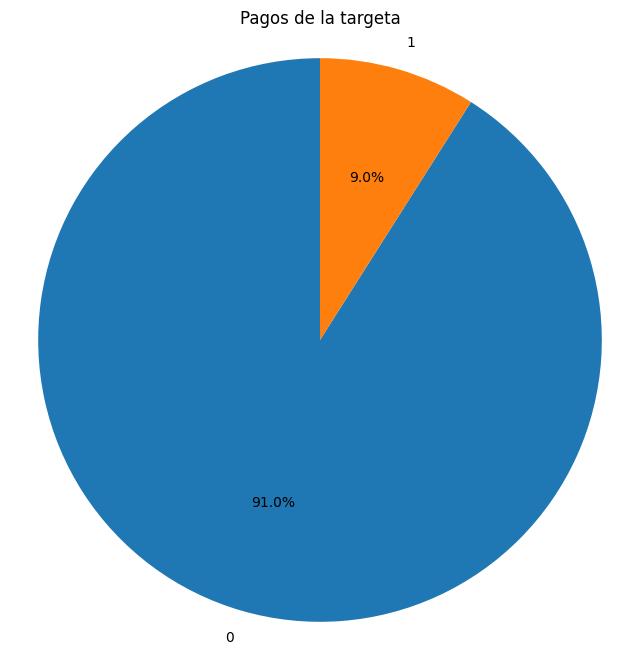

In [ ]:
frecuencia = data['target'].value_counts()

# Crear un gráfico de tortas
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(frecuencia.values, labels=frecuencia.index, autopct='%1.1f%%', startangle=90)

# Ajustar el aspecto del gráfico
ax.set_title('Pagos de la tarjeta')
ax.axis('equal')  # Para que el gráfico tenga forma de círculo

# Mostrar el gráfico
plt.show()

Este código genera un gráfico de torta que muestra la distribución de la columna "target" en los datos, lo que permite visualizar la proporción de cada valor en la columna. El objetivo de crear este gráfico de torta es visualizar la distribución de la columna "target" en un conjunto de datos. Proporciona una representación gráfica de cómo se distribuyen los diferentes valores en la columna y muestra la proporción relativa de cada valor.

Al crear este gráfico, se puede obtener información útil sobre la distribución de la variable objetivo, lo que puede ayudar en diferentes aspectos del análisis de datos y la construcción de modelos predictivos.

El objetivo de este gráfico es proporcionar una visualización rápida y comprensible de los pagos de la tarjeta, lo que puede ayudar a identificar patrones o tendencias en los datos. Esto puede ser útil para tomar decisiones informadas y diseñar estrategias de negocios relacionadas con los pagos de la tarjeta de crédito en el banco .



*   0 = Es el pago Total de la Tarjeta de Credito por el Cliente
*   1 = Es el pago mínimo de la Tarjeta de Credito por el Cliente



# Seleccionando las mejores variables para los modelos predictivos

In [ ]:
x = data.drop(['target'], axis=1)
y = data['target']
best = SelectKBest( k=21)
x_new = best.fit_transform(x, y)
selected = best.get_support(indices=True)
selected_columns = x.columns[selected]
print(selected_columns)

Index(['ColL1TE_T07', 'ColL1TE_T06', 'UsoL1_T06', 'FlgActCN_T05',
       'ColL1TE_T05', 'EeccNac_T05', 'UsoL1_T05', 'FlgActCN_T04',
       'ColL1TE_T04', 'UsoL1_T04', 'FlgAct_T03', 'FlgActCN_T03',
       'FlgActCCPC_T03', 'ColL1TE_T03', 'FlgAct_T02', 'FlgActCN_T02',
       'FlgActCCPC_T02', 'ColL1TE_T02', 'FlgAct_T01', 'FlgActCN_T01',
       'ColL1TE_T01'],
      dtype='object')


El código completo realiza una selección de características utilizando la técnica "SelectKBest" y muestra las columnas seleccionadas del conjunto de datos. El objetivo principal es reducir la dimensionalidad de los datos conservando las características más relevantes.

In [ ]:
k_values = range(5, 21)  # Rango de valores de k
best_features = []
best_score = 0

x = data.drop(['target'], axis=1)
y = data['target']

for k in k_values:
    selector = SelectKBest(score_func=f_regression, k=k)
    selector.fit(x, y)
    selected_features = selector.get_support(indices=True)
    score = selector.scores_.mean()

    if score > best_score:
        best_features = selected_features
        best_score = score


selected_feature_names = [x.columns[i] for i in best_features]


Este código realiza una búsqueda exhaustiva de las mejores características utilizando SelectKBest y f_regression como función de puntuación. Itera sobre un rango de valores de k, selecciona características y evalúa su puntuación. Al final, se obtienen los nombres de las características seleccionadas.

In [ ]:
print(selected_feature_names)

['FlgActCN_T04', 'ColL1TE_T04', 'FlgActCN_T03', 'FlgActCN_T02', 'FlgActCN_T01']


Aqui tenemos el resultado de las mejores columnas que podemos utilizar

# ***Supervisado***

### **Balanceo de datos**

* Durante este proceso también realizamos el balanceo de clases correspondiente ya que que nuestra variable target se encuentra con un desbalance significativo, en este caso aplicamos 2 tipos de de balanceo una es el submuestreo o undersampling que consiste en reducir la cantidad de ejemplos de la clase mayoritaria para que esté más equilibrada con la clase minoritaria. Esto se puede hacer seleccionando aleatoriamente una muestra de la clase mayoritaria hasta que la proporción de clases sea la deseada. Sin embargo, esta técnica puede provocar una pérdida de información. y también se utilizó sobremuestreo o oversampling que implica aumentar la cantidad de ejemplos de la clase minoritaria para que esté más equilibrada con la clase mayoritaria. Esto se puede lograr mediante la duplicación de ejemplos existentes o mediante técnicas más avanzadas como el método SMOTE (Synthetic Minority Over-sampling Technique), que genera ejemplos sintéticos basados en los ejemplos existentes y por último dejamos la data sin balancear para saber si nuestros datos varían y realizar una comparación de métricas al final.

# Aplicando KNN


In [ ]:
#SMOTE SVM o oversampling
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import make_scorer

# Separar las características y la variable objetivo
X = data[['ColL1TE_T05', 'FlgActCN_T04', 'ColL1TE_T04', 'FlgAct_T03',
          'FlgActCN_T03', 'ColL1TE_T03', 'FlgAct_T02', 'FlgActCN_T02',
          'ColL1TE_T02', 'FlgActCN_T01']]
y = data['target']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicar el balanceo de clases mediante SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Crear y entrenar el modelo KNN
knn = KNeighborsClassifier()
knn.fit(X_train_balanced, y_train_balanced)

# Realizar las predicciones en el conjunto de prueba
y_pred = knn.predict(X_test)

# Calcular las métricas de evaluación
accuracy_KNN_SMOTE = accuracy_score(y_test, y_pred)
f1_KNN_SMOTE = f1_score(y_test, y_pred)
recall_KNN_SMOTE = recall_score(y_test, y_pred)

scores = cross_val_score(knn, X_train_balanced, y_train_balanced, cv=5, scoring=make_scorer(accuracy_score))

# Imprimir las métricas de evaluación
print("Accuracy:", accuracy_KNN_SMOTE)
print("F1 Score:", f1_KNN_SMOTE)
print("Recall:", recall_KNN_SMOTE)
#Cross-Validation
print("Accuracy Scores:", scores)
print("Mean Accuracy:", scores.mean())
print("Accuracy Standard Deviation:", scores.std())



Accuracy: 0.7673349633251834
F1 Score: 0.29217494793216303
Recall: 0.5088082901554404
Accuracy Scores: [0.82798873 0.82262176 0.81745606 0.8231466  0.82099966]
Mean Accuracy: 0.8224425620053623
Accuracy Standard Deviation: 0.0034127679004487196


Este código prepara los datos, entrena un modelo K-NN, realiza predicciones y evalúa el modelo utilizando métricas de evaluación. También guarda el resultado de la precisión del modelo para su posterior comparación.


* Se imprime la precisión del modelo utilizando accuracy_score.
* Se imprime el puntaje F1 del modelo utilizando f1_score.
* Se imprime el recall del modelo utilizando recall_score.



* Accuracy : El accuracy es la métrica más común para evaluar modelos de clasificación. Representa la proporción de muestras correctamente clasificadas en relación con el total de muestras.

* F1-score: El F1-score es una métrica que combina la precisión y el recall en una sola medida. Es útil cuando el desequilibrio de clases es significativo. El F1-score se calcula como la media armónica de la precisión y el recall.

* Recall : El recall, también conocido como sensibilidad o tasa de verdaderos positivos, representa la proporción de muestras positivas que son correctamente clasificadas.

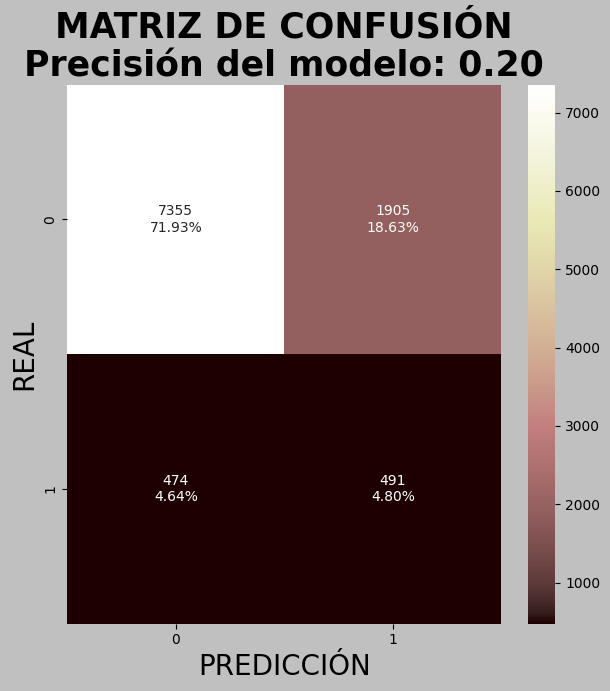

In [ ]:
# Evaluación del modelo
matriz_modelo_KNN_SMOKE = confusion_matrix(y_test, y_pred)
precision_KNN_SMOKE = precision_score(y_test, y_pred)

plt.figure(figsize=(7, 7), facecolor='silver')
clases = valores_unicos_Target
group_counts = ["{0:0.0f}".format(value) for value in matriz_modelo_KNN_SMOKE.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in matriz_modelo_KNN_SMOKE.flatten() / matriz_modelo_KNN_SMOKE.sum()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)

sns.heatmap(matriz_modelo_KNN_SMOKE, annot=labels, fmt='', cmap='pink', xticklabels=clases, yticklabels=clases)

plt.title(f"MATRIZ DE CONFUSIÓN\nPrecisión del modelo: {precision_KNN_SMOKE:.2f}", fontsize=25, fontweight="bold")
plt.xlabel("PREDICCIÓN", fontsize=20)
plt.ylabel("REAL", fontsize=20)

plt.show()

La precisión del modelo de 0.20 indica que el modelo tiene un bajo rendimiento en la clasificación correcta de las instancias positivas. La precisión es una medida de qué tan bien el modelo identifica correctamente las muestras positivas en comparación con el total de muestras clasificadas como positivas.

* Accuracy (Precisión): El modelo tiene una precisión de 0.767, lo que significa que acierta en sus predicciones aproximadamente el 76.7% de las veces. La precisión es una medida de qué tan bien el modelo clasifica correctamente las instancias positivas y negativas.

* F1 Score: El F1 Score es una métrica que combina la precisión y el recall (sensibilidad) en un solo valor. En este caso, el F1 Score es de 0.292, lo que indica que el modelo tiene un rendimiento bajo en la clasificación de las instancias positivas.

* Recall (Sensibilidad): El recall es una medida de la proporción de instancias positivas que el modelo clasifica correctamente. En este caso, el recall es de 0.509, lo que indica que el modelo tiene un rendimiento medio en la identificación de las instancias positivas.

* Accuracy Scores (Puntuaciones de precisión): Se proporcionan una serie de puntuaciones de precisión obtenidas en diferentes evaluaciones del modelo. Estas puntuaciones varían entre 0.817 y 0.828, lo que indica que el modelo tiene una precisión relativamente estable en diferentes ejecuciones.

* Mean Accuracy (Precisión media): La precisión media del modelo, calculada a partir de las puntuaciones de precisión, es de 0.822. Esto sugiere que, en promedio, el modelo clasifica correctamente aproximadamente el 82.2% de las instancias.

* Accuracy Standard Deviation (Desviación estándar de precisión): La desviación estándar de las puntuaciones de precisión es de 0.003, lo que indica una variabilidad baja en la precisión del modelo en diferentes evaluaciones.

In [ ]:
# Undersample KNN
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import make_scorer

# Separar las características y la variable objetivo
X = data[['ColL1TE_T05', 'FlgActCN_T04', 'ColL1TE_T04', 'FlgAct_T03',
          'FlgActCN_T03', 'ColL1TE_T03', 'FlgAct_T02', 'FlgActCN_T02',
          'ColL1TE_T02', 'FlgActCN_T01']]
y = data['target']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicar el balanceo de clases mediante submuestreo (undersampling)
undersampler = RandomUnderSampler(random_state=42)
X_train_balanced, y_train_balanced = undersampler.fit_resample(X_train, y_train)

# Crear y entrenar el modelo KNN
knn = KNeighborsClassifier()
knn.fit(X_train_balanced, y_train_balanced)

# Realizar las predicciones en el conjunto de prueba
y_pred = knn.predict(X_test)

# Calcular las métricas de evaluación
accuracy_Under_KNN = accuracy_score(y_test, y_pred)
f1_Under_KNN = f1_score(y_test, y_pred)
recall_Under_KNN = recall_score(y_test, y_pred)

# Aplicar cross-validation con 5 folds y calcular la precisión (accuracy)
scores = cross_val_score(knn, X_train_balanced, y_train_balanced, cv=5, scoring=make_scorer(accuracy_score))

# Imprimir las métricas de evaluación
print("Accuracy:", accuracy_Under_KNN)
print("F1 Score:", f1_Under_KNN)
print("Recall:", recall_Under_KNN)
print("Accuracy Scores:", scores)
print("Mean Accuracy:", scores.mean())
print("Accuracy Standard Deviation:", scores.std())



Accuracy: 0.6925183374083129
F1 Score: 0.28900949796472186
Recall: 0.6621761658031088
Accuracy Scores: [0.69807428 0.68775791 0.69669876 0.69669876 0.70770289]
Mean Accuracy: 0.6973865199449795
Accuracy Standard Deviation: 0.0063333504446884846


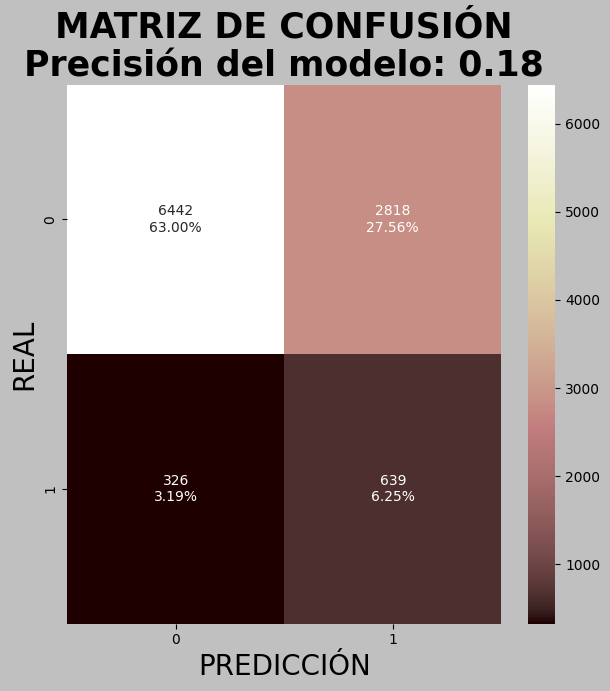

In [ ]:
# Evaluación del modelo
matriz_modelo_KNN_UNDER = confusion_matrix(y_test, y_pred)
precision_KNN_UNDER = precision_score(y_test, y_pred)

plt.figure(figsize=(7, 7), facecolor='silver')
clases = valores_unicos_Target
group_counts = ["{0:0.0f}".format(value) for value in matriz_modelo_KNN_UNDER.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in matriz_modelo_KNN_UNDER.flatten() / matriz_modelo_KNN_UNDER.sum()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)

sns.heatmap(matriz_modelo_KNN_UNDER, annot=labels, fmt='', cmap='pink', xticklabels=clases, yticklabels=clases)

plt.title(f"MATRIZ DE CONFUSIÓN\nPrecisión del modelo: {precision_KNN_UNDER:.2f}", fontsize=25, fontweight="bold")
plt.xlabel("PREDICCIÓN", fontsize=20)
plt.ylabel("REAL", fontsize=20)

plt.show()

La precisión del modelo de 0.18 indica que el modelo tiene un rendimiento muy bajo en la clasificación correcta de las instancias positivas. La precisión es una medida de qué tan bien el modelo identifica correctamente las muestras positivas en comparación con el total de muestras clasificadas como positivas.

* Accuracy (Precisión): El modelo tiene una precisión de 0.693, lo que indica que acierta en sus predicciones aproximadamente el 69.3% de las veces. La precisión es una medida de qué tan bien el modelo clasifica correctamente las instancias positivas y negativas.

* F1 Score: El F1 Score es una métrica que combina la precisión y el recall (sensibilidad) en un solo valor. En este caso, el F1 Score es de 0.289, lo que indica que el modelo tiene un rendimiento bajo en la clasificación de las instancias positivas.

* Recall (Sensibilidad): El recall es una medida de la proporción de instancias positivas que el modelo clasifica correctamente. En este caso, el recall es de 0.662, lo que indica que el modelo tiene un rendimiento medio en la identificación de las instancias positivas.

* Accuracy Scores (Puntuaciones de precisión): Se proporciona una serie de puntuaciones de precisión obtenidas en diferentes evaluaciones del modelo. Estas puntuaciones varían entre 0.688 y 0.708, lo que indica cierta variabilidad en la precisión del modelo en diferentes ejecuciones.

* Mean Accuracy (Precisión media): La precisión media del modelo, calculada a partir de las puntuaciones de precisión, es de 0.697. Esto sugiere que, en promedio, el modelo clasifica correctamente aproximadamente el 69.7% de las instancias.

* Accuracy Standard Deviation (Desviación estándar de precisión): La desviación estándar de las puntuaciones de precisión es de 0.006, lo que indica una variabilidad relativamente baja en la precisión del modelo en diferentes evaluaciones.

In [ ]:
#Sin balanceo
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score

# Separar las características y la variable objetivo
X = data[['ColL1TE_T05', 'FlgActCN_T04', 'ColL1TE_T04', 'FlgAct_T03',
          'FlgActCN_T03', 'ColL1TE_T03', 'FlgAct_T02', 'FlgActCN_T02',
          'ColL1TE_T02', 'FlgActCN_T01']]
y = data['target']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creación del clasificador K-NN
knn = KNeighborsClassifier(n_neighbors=5)

# Realizar la validación cruzada con 5 folds
scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')

# Calcular la precisión promedio y la desviación estándar
mean_score = scores.mean()
std_score = scores.std()

# Entrenamiento del modelo K-NN
knn.fit(X_train, y_train)

# Predicción en el conjunto de prueba
y_pred = knn.predict(X_test)

# Evaluación del modelo
accuracy_model = accuracy_score(y_test, y_pred)
f1_model = f1_score(y_test, y_pred)
recall_model = recall_score(y_test, y_pred)

# Imprimir los resultados

print("{0:<20} : {1}".format('Accuracy del modelo', accuracy_model))
print("{0:<20} : {1}".format('F1 score del modelo', f1_model))
print("{0:<20} : {1}".format('Recall del modelo', recall_model))
#Cross-Validation
print('Accuracy Scores:', scores)
print('Mean Accuracy:', mean_score)
print('Accuracy Standard Deviation:', std_score)



Accuracy del modelo  : 0.8959413202933986
F1 score del modelo  : 0.21068249258160238
Recall del modelo    : 0.14715025906735751
Accuracy Scores: [0.89809291 0.8994621  0.90689487 0.90464548 0.88996479]
Mean Accuracy: 0.8998120286511243
Accuracy Standard Deviation: 0.0058919394373013545


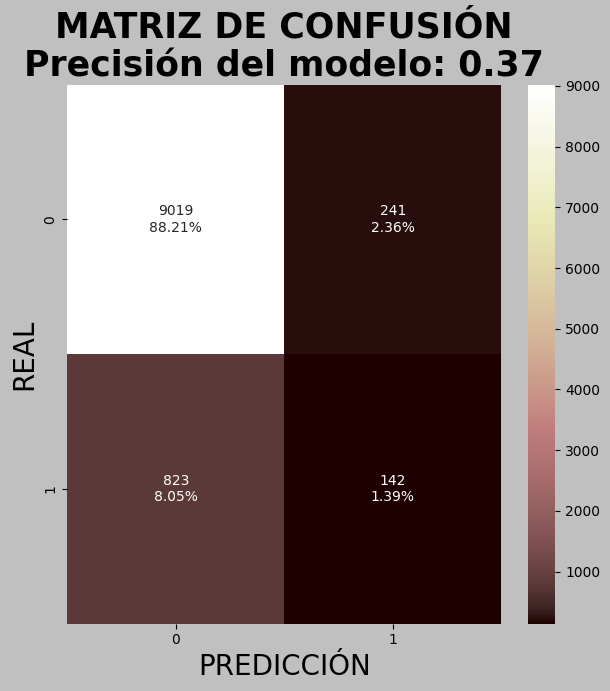

In [ ]:
# Evaluación del modelo
matriz_modelo_KNN1 = confusion_matrix(y_test, y_pred)
precision_KNN1 = precision_score(y_test, y_pred)

plt.figure(figsize=(7, 7), facecolor='silver')
clases = valores_unicos_Target
group_counts = ["{0:0.0f}".format(value) for value in matriz_modelo_KNN1.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in matriz_modelo_KNN1.flatten() / matriz_modelo_KNN1.sum()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)

sns.heatmap(matriz_modelo_KNN1, annot=labels, fmt='', cmap='pink', xticklabels=clases, yticklabels=clases)

plt.title(f"MATRIZ DE CONFUSIÓN\nPrecisión del modelo: {precision_KNN1:.2f}", fontsize=25, fontweight="bold")
plt.xlabel("PREDICCIÓN", fontsize=20)
plt.ylabel("REAL", fontsize=20)

plt.show()

Un valor de precisión (accuracy) de 0.37 indica que el modelo tiene un rendimiento bajo en la clasificación correcta de las instancias. La precisión es una medida de qué tan bien el modelo clasifica correctamente las instancias positivas y negativas.

* Accuracy del modelo: El modelo tiene una precisión (accuracy) de 0.896, lo que indica que acierta en sus predicciones aproximadamente el 89.6% de las veces. La precisión es una medida de qué tan bien el modelo clasifica correctamente las instancias positivas y negativas.

* F1 score del modelo: El F1 score es de 0.211, lo cual indica que el modelo tiene un rendimiento bajo en la clasificación de las instancias positivas. El F1 score es una métrica que combina la precisión y el recall en un solo valor.

* Recall del modelo: El recall del modelo es de 0.147, lo que sugiere que el modelo tiene dificultades para identificar correctamente las instancias positivas. El recall es una medida de la proporción de instancias positivas que el modelo clasifica correctamente.

* Accuracy Scores: Se proporciona una serie de puntuaciones de precisión obtenidas en diferentes evaluaciones del modelo. Estas puntuaciones varían entre 0.890 y 0.907, lo que indica cierta variabilidad en la precisión del modelo en diferentes ejecuciones.

* Mean Accuracy: La precisión media del modelo, calculada a partir de las puntuaciones de precisión, es de 0.900. Esto significa que, en promedio, el modelo clasifica correctamente alrededor del 90% de las instancias.

* Accuracy Standard Deviation: La desviación estándar de las puntuaciones de precisión es de 0.006, lo que indica que hay una variabilidad relativamente baja en la precisión del modelo en diferentes evaluaciones.

# Aplicando SVM

In [ ]:
#SMOTE SVM o oversampling
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, recall_score
from imblearn.over_sampling import SMOTE

# Separar las características y la variable objetivo
X = data[['ColL1TE_T05', 'FlgActCN_T04', 'ColL1TE_T04', 'FlgAct_T03',
          'FlgActCN_T03', 'ColL1TE_T03', 'FlgAct_T02', 'FlgActCN_T02',
          'ColL1TE_T02', 'FlgActCN_T01']]
y = data['target']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicar el balanceo de clases mediante SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Crear el modelo SVM
svm = SVC()

# Realizar la validación cruzada con 5 folds
scores = cross_val_score(svm, X_train_balanced, y_train_balanced, cv=5, scoring='accuracy')

# Calcular la precisión promedio y la desviación estándar
mean_score = scores.mean()
std_score = scores.std()

# Entrenar el modelo SVM en el conjunto de entrenamiento balanceado
svm.fit(X_train_balanced, y_train_balanced)

# Realizar las predicciones en el conjunto de prueba
y_pred = svm.predict(X_test)

# Calcular las métricas de evaluación en el conjunto de prueba
accuracy_SVM_SMOTE = accuracy_score(y_test, y_pred)
f1_SVM_SMOTE = f1_score(y_test, y_pred)
recall_SVM_SMOTE = recall_score(y_test, y_pred)

# Imprimir los resultados
print("{0:<20} : {1}".format('Accuracy del modelo', accuracy_SVM_SMOTE))
print("{0:<20} : {1}".format('F1 score del modelo', f1_SVM_SMOTE))
print("{0:<20} : {1}".format('Recall del modelo', recall_SVM_SMOTE))
#Cross-Validation
print('Accuracy Scores:', scores)
print('Mean Accuracy:', mean_score)
print('Accuracy Standard Deviation:', std_score)



Accuracy del modelo  : 0.7278239608801956
F1 score del modelo  : 0.30477142143392455
Recall del modelo    : 0.6321243523316062
Accuracy Scores: [0.70622568 0.71065343 0.70448142 0.71700772 0.70452868]
Mean Accuracy: 0.7085793846289705
Accuracy Standard Deviation: 0.004776607032516823


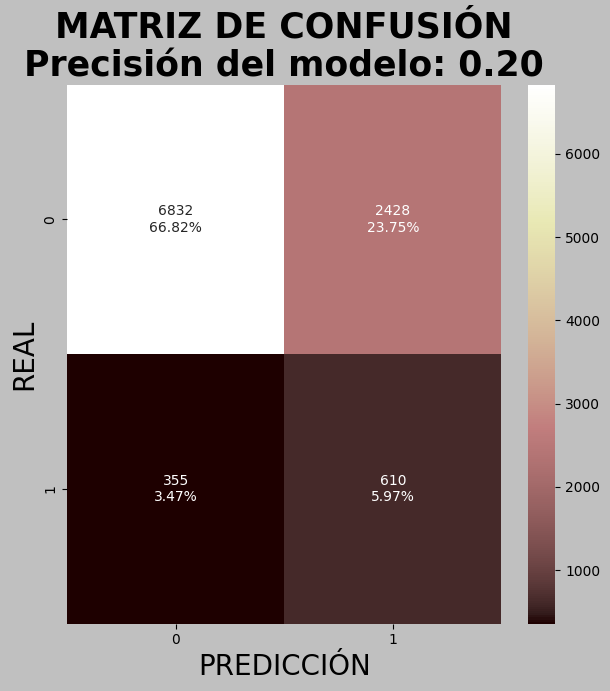

In [ ]:
# Evaluación del modelo
matriz_modelo_SVM_SMOTE = confusion_matrix(y_test, y_pred)
precision_SVM_SMOTE = precision_score(y_test, y_pred)

plt.figure(figsize=(7, 7), facecolor='silver')
clases = valores_unicos_Target
group_counts = ["{0:0.0f}".format(value) for value in matriz_modelo_SVM_SMOTE.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in matriz_modelo_SVM_SMOTE.flatten() / matriz_modelo_SVM_SMOTE.sum()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)

sns.heatmap(matriz_modelo_SVM_SMOTE, annot=labels, fmt='', cmap='pink', xticklabels=clases, yticklabels=clases)

plt.title(f"MATRIZ DE CONFUSIÓN\nPrecisión del modelo: {precision_SVM_SMOTE:.2f}", fontsize=25, fontweight="bold")
plt.xlabel("PREDICCIÓN", fontsize=20)
plt.ylabel("REAL", fontsize=20)
clear_output()
plt.show()

El resultado de precisión del modelo SVM con la técnica SMOTE es de 0.20. Esto significa que el modelo clasifica correctamente aproximadamente el 20% de las instancias en el conjunto de prueba.

* Accuracy del modelo: El modelo tiene una precisión (accuracy) de 0.728, lo que significa que acierta en sus predicciones aproximadamente el 72.8% de las veces. La precisión es una medida de qué tan bien el modelo clasifica correctamente las instancias positivas y negativas.

* F1 score del modelo: El F1 score es de 0.305, lo cual indica que el modelo tiene un rendimiento moderado en la clasificación de las instancias positivas. El F1 score es una métrica que combina la precisión y el recall en un solo valor.

* Recall del modelo: El recall del modelo es de 0.632, lo que sugiere que el modelo tiene un rendimiento relativamente alto en la identificación de las instancias positivas. El recall es una medida de la proporción de instancias positivas que el modelo clasifica correctamente.

* Accuracy Scores: Se proporciona una serie de puntuaciones de precisión obtenidas en diferentes evaluaciones del modelo. Estas puntuaciones varían entre 0.704 y 0.717, lo que indica cierta variabilidad en la precisión del modelo en diferentes ejecuciones.

* Mean Accuracy: La precisión media del modelo, calculada a partir de las puntuaciones de precisión, es de 0.709. Esto sugiere que, en promedio, el modelo clasifica correctamente alrededor del 70.9% de las instancias.

* Accuracy Standard Deviation: La desviación estándar de las puntuaciones de precisión es de 0.005, lo que indica una variabilidad relativamente baja en la precisión del modelo en diferentes evaluaciones.

In [ ]:
# Undersample SVM
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, recall_score
from imblearn.under_sampling import RandomUnderSampler

# Separar las características y la variable objetivo
X = data[['ColL1TE_T05', 'FlgActCN_T04', 'ColL1TE_T04', 'FlgAct_T03',
          'FlgActCN_T03', 'ColL1TE_T03', 'FlgAct_T02', 'FlgActCN_T02',
          'ColL1TE_T02', 'FlgActCN_T01']]
y = data['target']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicar el submuestreo de la clase mayoritaria mediante RandomUnderSampler
undersampler = RandomUnderSampler(random_state=42)
X_train_balanced, y_train_balanced = undersampler.fit_resample(X_train, y_train)

# Crear el modelo SVM
svm = SVC()

# Realizar la validación cruzada con 5 folds
scores = cross_val_score(svm, X_train_balanced, y_train_balanced, cv=5, scoring='accuracy')

# Calcular la precisión promedio y la desviación estándar
mean_score = scores.mean()
std_score = scores.std()

# Realizar el entrenamiento final en el conjunto de entrenamiento balanceado
svm.fit(X_train_balanced, y_train_balanced)

# Realizar las predicciones en el conjunto de prueba
y_pred = svm.predict(X_test)

# Calcular las métricas de evaluación en el conjunto de prueba
accuracy_Under_SVM = accuracy_score(y_test, y_pred)
f1_Under_SVM = f1_score(y_test, y_pred)
recall_Under_SVM = recall_score(y_test, y_pred)

# Imprimir los resultados

print("{0:<20} : {1}".format('Accuracy del modelo', accuracy_Under_SVM))
print("{0:<20} : {1}".format('F1 score del modelo', f1_Under_SVM))
print("{0:<20} : {1}".format('Recall del modelo', recall_Under_SVM))
#Cross-Validation
print('Accuracy Scores:', scores)
print('Mean Accuracy:', mean_score)
print('Accuracy Standard Deviation:', std_score)




Accuracy del modelo  : 0.7236185819070905
F1 score del modelo  : 0.3046259842519685
Recall del modelo    : 0.6414507772020726
Accuracy Scores: [0.70839065 0.68775791 0.70082531 0.69876204 0.70220083]
Mean Accuracy: 0.6995873452544703
Accuracy Standard Deviation: 0.006730195225708409


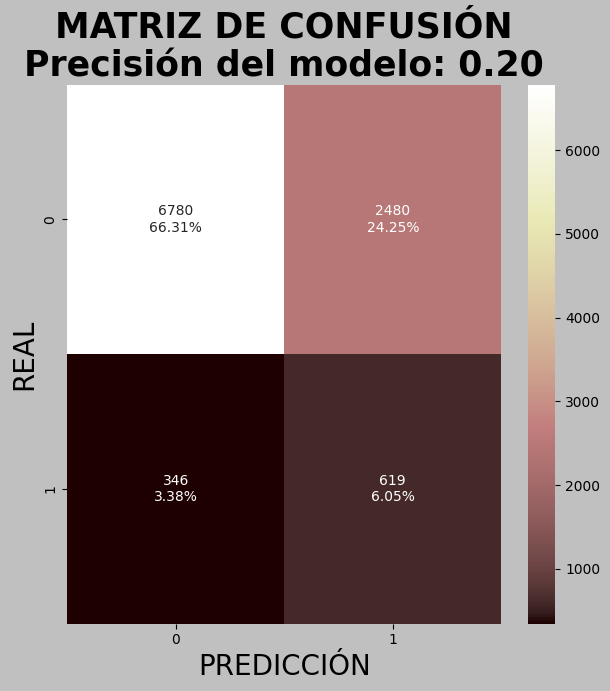

In [ ]:
# Evaluación del modelo
matriz_modelo_SVM_UNDER = confusion_matrix(y_test, y_pred)
precision_SVM_UNDER = precision_score(y_test, y_pred)

plt.figure(figsize=(7, 7), facecolor='silver')
clases = valores_unicos_Target
group_counts = ["{0:0.0f}".format(value) for value in matriz_modelo_SVM_UNDER.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in matriz_modelo_SVM_UNDER.flatten() / matriz_modelo_SVM_UNDER.sum()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)

sns.heatmap(matriz_modelo_SVM_UNDER, annot=labels, fmt='', cmap='pink', xticklabels=clases, yticklabels=clases)

plt.title(f"MATRIZ DE CONFUSIÓN\nPrecisión del modelo: {precision_SVM_UNDER:.2f}", fontsize=25, fontweight="bold")
plt.xlabel("PREDICCIÓN", fontsize=20)
plt.ylabel("REAL", fontsize=20)
clear_output()
plt.show()

El resultado de precisión del modelo SVM con la técnica de submuestreo (UNDER) es de 0.20. Esto significa que el modelo clasifica correctamente aproximadamente el 20% de las instancias en el conjunto de prueba.

* Accuracy del modelo: El modelo tiene una precisión (accuracy) de 0.724, lo que significa que acierta en sus predicciones aproximadamente el 72.4% de las veces. La precisión es una medida de qué tan bien el modelo clasifica correctamente las instancias positivas y negativas.

* F1 score del modelo: El F1 score es de 0.305, lo cual indica que el modelo tiene un rendimiento moderado en la clasificación de las instancias positivas. El F1 score es una métrica que combina la precisión y el recall en un solo valor.

* Recall del modelo: El recall del modelo es de 0.641, lo que sugiere que el modelo tiene un rendimiento relativamente alto en la identificación de las instancias positivas. El recall es una medida de la proporción de instancias positivas que el modelo clasifica correctamente.

* Accuracy Scores: Se proporciona una serie de puntuaciones de precisión obtenidas en diferentes evaluaciones del modelo. Estas puntuaciones varían entre 0.688 y 0.709, lo que indica cierta variabilidad en la precisión del modelo en diferentes ejecuciones.

* Mean Accuracy: La precisión media del modelo, calculada a partir de las puntuaciones de precisión, es de 0.700. Esto sugiere que, en promedio, el modelo clasifica correctamente alrededor del 70.0% de las instancias.

* Accuracy Standard Deviation: La desviación estándar de las puntuaciones de precisión es de 0.007, lo que indica una variabilidad relativamente baja en la precisión del modelo en diferentes evaluaciones.

In [ ]:
#Sin balanceo
# Separar las características y la variable objetivo
X = data[['ColL1TE_T05', 'FlgActCN_T04', 'ColL1TE_T04', 'FlgAct_T03',
          'FlgActCN_T03', 'ColL1TE_T03', 'FlgAct_T02', 'FlgActCN_T02',
          'ColL1TE_T02', 'FlgActCN_T01']]
y = data['target']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear un objeto SVM de clasificación
model = SVC()

# Realizar la validación cruzada con 5 folds
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

# Calcular la precisión promedio y la desviación estándar
mean_score = scores.mean()
std_score = scores.std()

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular las métricas de evaluación en el conjunto de prueba
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

# Imprimir los resultados
print("{0:<20} : {1}".format('Accuracy del modelo', accuracy))
print("{0:<20} : {1}".format('F1 score del modelo', f1))
print("{0:<20} : {1}".format('Recall del modelo', recall))
#Cross-Validation
print('Accuracy Scores:', scores)
print('Mean Accuracy:', mean_score)
print('Accuracy Standard Deviation:', std_score)

Accuracy del modelo  : 0.9056234718826406
F1 score del modelo  : 0.8607722196185016
Recall del modelo    : 0.9056234718826406
Accuracy Scores: [0.91112469 0.91112469 0.91112469 0.91112469 0.91111383]
Mean Accuracy: 0.9111225211204914
Accuracy Standard Deviation: 4.346512073505338e-06


Este código prepara los datos, entrena un modelo K-NN, realiza predicciones y evalúa el modelo utilizando métricas de evaluación. También guarda el resultado de la precisión del modelo para su posterior comparación.

Se imprime la precisión del modelo utilizando accuracy_score.
Se imprime el puntaje F1 del modelo utilizando f1_score.
Se imprime el recall del modelo utilizando recall_score.

* Accuracy : El accuracy es la métrica más común para evaluar modelos de clasificación. Representa la proporción de muestras correctamente clasificadas en relación con el total de muestras.

* F1-score: El F1-score es una métrica que combina la precisión y el recall en una sola medida. Es útil cuando el desequilibrio de clases es significativo. El F1-score se calcula como la media armónica de la precisión y el recall.

* Recall : El recall, también conocido como sensibilidad o tasa de verdaderos positivos, representa la proporción de muestras positivas que son correctamente clasificadas.

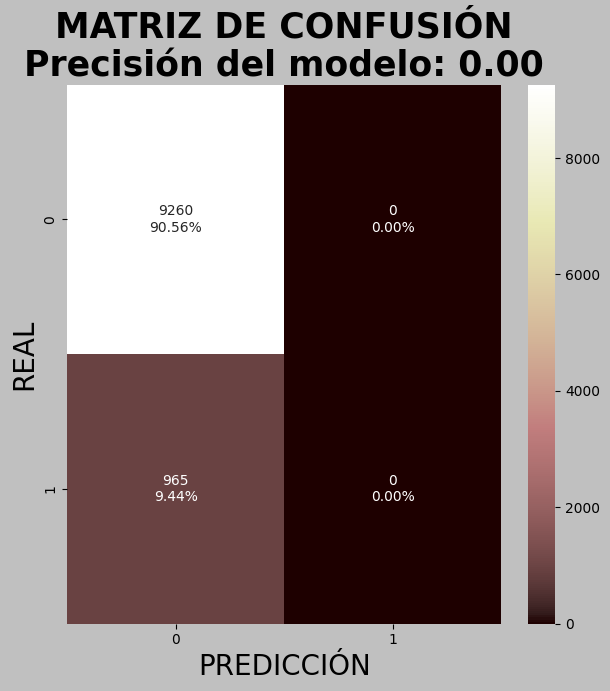

In [ ]:
# Evaluación del modelo
matriz_modelo1 = confusion_matrix(y_test, y_pred)
precision_1 = precision_score(y_test, y_pred)

plt.figure(figsize=(7, 7), facecolor='silver')
clases = valores_unicos_Target
group_counts = ["{0:0.0f}".format(value) for value in matriz_modelo1.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in matriz_modelo1.flatten() / matriz_modelo1.sum()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)

sns.heatmap(matriz_modelo1, annot=labels, fmt='', cmap='pink', xticklabels=clases, yticklabels=clases)

plt.title(f"MATRIZ DE CONFUSIÓN\nPrecisión del modelo: {precision_1:.2f}", fontsize=25, fontweight="bold")
plt.xlabel("PREDICCIÓN", fontsize=20)
plt.ylabel("REAL", fontsize=20)
clear_output()
plt.show()

Un puntaje de precisión de 0.00 indica que el modelo no clasificó correctamente ninguna instancia. Esto sugiere que el modelo no pudo predecir correctamente ninguna de las clases y no tuvo un rendimiento satisfactorio en la clasificación. Sería necesario investigar y revisar el modelo, así como los datos y las características utilizadas, para determinar las posibles causas de esta baja precisión y buscar formas de mejorar el rendimiento del modelo.

* El accuracy del modelo es de 0.906, lo cual indica que el modelo clasifica correctamente alrededor del 90.6% de las instancias.

* El F1 score del modelo es de 0.861, lo cual indica un rendimiento muy bueno en la clasificación de las instancias positivas. El F1 score es una métrica que combina la precisión y el recall en un solo valor.

* El recall del modelo es de 0.906, lo que sugiere que el modelo tiene un rendimiento muy alto en la identificación de las instancias positivas. El recall es una medida de la proporción de instancias positivas que el modelo clasifica correctamente.

* Las puntuaciones de precisión obtenidas en diferentes evaluaciones del modelo son muy altas, todas alrededor de 0.911. Esto indica una consistencia en la precisión del modelo en diferentes ejecuciones.

* La precisión media del modelo, calculada a partir de las puntuaciones de precisión, es de 0.911. Esto sugiere que, en promedio, el modelo clasifica correctamente alrededor del 91.1% de las instancias.

* La desviación estándar de las puntuaciones de precisión es muy baja, alrededor de 4.35e-06, lo que indica una variabilidad extremadamente baja en la precisión del modelo en diferentes evaluaciones. Esto indica una alta consistencia en la precisión del modelo.

## Evaluación de resultados de SVM

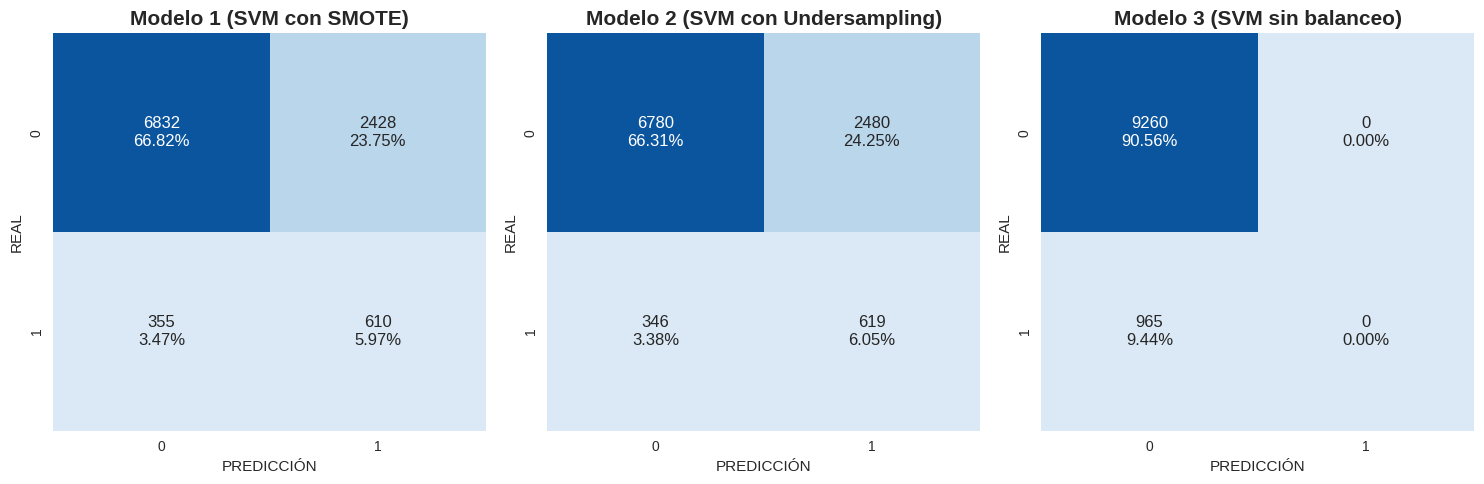

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Crear una lista con las matrices de confusión
matrices = [matriz_modelo_SVM_SMOTE, matriz_modelo_SVM_UNDER, matriz_modelo1]
precisiones = [precision_SVM_SMOTE, precision_SVM_UNDER, precision_1]

# Configurar los valores únicos para el eje x e y
valores_unicos_Target = valores_unicos_Target

# Crear una lista con las etiquetas personalizadas para cada matriz
etiquetas_personalizadas = ["Modelo 1 (SVM con SMOTE)", "Modelo 2 (SVM con Undersampling)", "Modelo 3 (SVM sin balanceo)"]

# Crear la figura y los subplots
fig, axs = plt.subplots(1, len(matrices), figsize=(15, 5))

# Colores para la matriz de confusión
cmap = sns.color_palette("Blues")

# Iterar sobre las matrices y generar los gráficos
for i, matriz in enumerate(matrices):
    ax = axs[i]
    group_counts = ["{0:0.0f}".format(value) for value in matriz.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in matriz.flatten() / matriz.sum()]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(len(valores_unicos_Target), len(valores_unicos_Target))

    sns.heatmap(matriz, annot=labels, fmt='', cmap=cmap, xticklabels=valores_unicos_Target, yticklabels=valores_unicos_Target, ax=ax, cbar=False)

    ax.set_title(etiquetas_personalizadas[i], fontsize=15, fontweight="bold")  # Utilizar la etiqueta personalizada en lugar del título predeterminado
    ax.set_xlabel("PREDICCIÓN")
    ax.set_ylabel("REAL")


# Ajustar el espaciado entre subplots
plt.tight_layout()

# Mostrar la figura
plt.show()


### SVM   


# Predicción 1
El resultado de precisión del modelo SVM con la técnica SMOTE es de 0.20. Esto significa que el modelo clasifica correctamente aproximadamente el 20% de las instancias en el conjunto de prueba.

* Verdaderos Positivos (VP): 6832

* Verdaderos Negativos (VN): 610

* Falsos Positivos (FP): 2428

* Falsos Negativos (FN): 355

# Predicción 2
El resultado de precisión del modelo SVM con la técnica de submuestreo (UNDER) es de 0.20. Esto significa que el modelo clasifica correctamente aproximadamente el 20% de las instancias en el conjunto de prueba.

* Verdaderos Positivos (VP): 6780

* Verdaderos Negativos (VN): 619

* Falsos Positivos (FP): 2480

* Falsos Negativos (FN): 346

# Predicción 3
Un puntaje de precisión de 0.00 indica que el modelo no clasificó correctamente ninguna instancia. Esto sugiere que el modelo no pudo predecir correctamente ninguna de las clases

* Verdaderos Positivos (VP): 9260

* Verdaderos Negativos (VN): 0

* Falsos Positivos (FP): 0

* Falsos Negativos (FN): 965



## Evaluación de resultados de K-NN

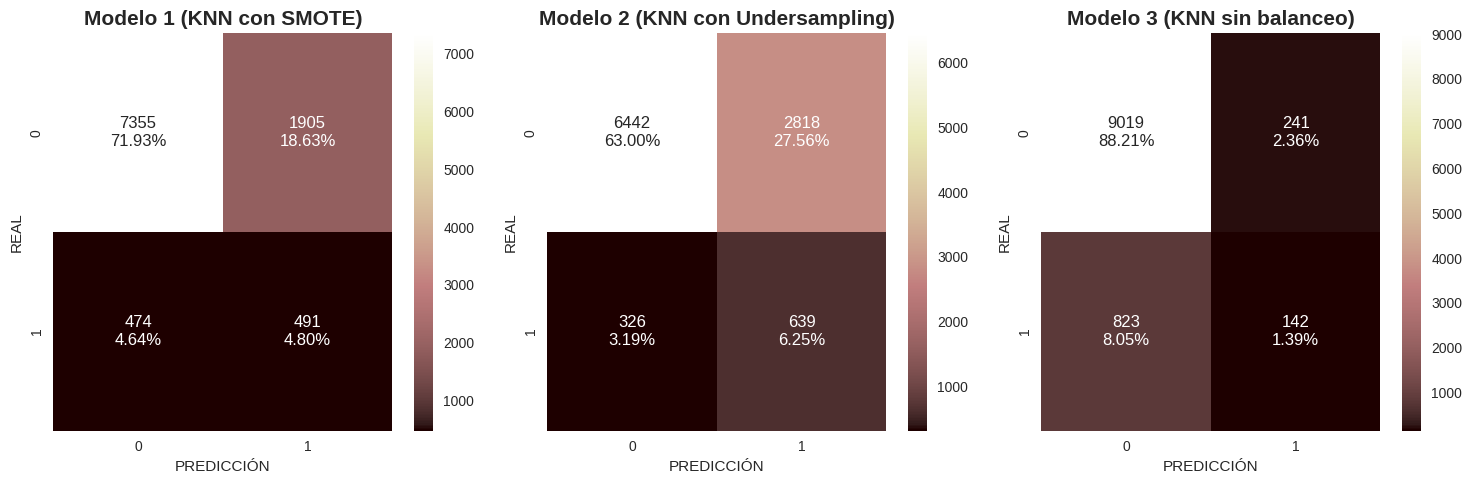

In [ ]:
# Crear una lista con las matrices de confusión
matrices = [matriz_modelo_KNN_SMOKE, matriz_modelo_KNN_UNDER, matriz_modelo_KNN1]
precisiones = [precision_KNN_SMOKE, precision_KNN_UNDER, precision_KNN1]

# Configurar los valores únicos para el eje x e y
valores_unicos_Target = valores_unicos_Target

# Crear una lista con las etiquetas personalizadas para cada matriz
etiquetas_personalizadas = ["Modelo 1 (KNN con SMOTE)", "Modelo 2 (KNN con Undersampling)", "Modelo 3 (KNN sin balanceo)"]

# Crear la figura y los subplots
fig, axs = plt.subplots(1, len(matrices), figsize=(15, 5))

# Iterar sobre las matrices y generar los gráficos
for i, matriz in enumerate(matrices):
    ax = axs[i]
    group_counts = ["{0:0.0f}".format(value) for value in matriz.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in matriz.flatten() / matriz.sum()]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(len(valores_unicos_Target), len(valores_unicos_Target))

    sns.heatmap(matriz, annot=labels, fmt='', cmap='pink', xticklabels=valores_unicos_Target, yticklabels=valores_unicos_Target, ax=ax)

    ax.set_title(etiquetas_personalizadas[i], fontsize=15, fontweight="bold")  # Utilizar la etiqueta personalizada en lugar del título predeterminado
    ax.set_xlabel("PREDICCIÓN")
    ax.set_ylabel("REAL")

# Ajustar el espaciado entre subplots
plt.tight_layout()

# Mostrar la figura
plt.show()


### KNN   


# Predicción 1
La precisión del modelo de 0.20 indica que el modelo tiene un bajo rendimiento en la clasificación correcta de las instancias positivas. La precisión es una medida de qué tan bien el modelo identifica correctamente las muestras positivas en comparación con el total de muestras clasificadas como positivas.

* Verdaderos Positivos (VP): 7355

* Verdaderos Negativos (VN): 491

* Falsos Positivos (FP): 1905

* Falsos Negativos (FN): 474

# Predicción 2

La precisión del modelo de 0.18 indica que el modelo tiene un rendimiento muy bajo en la clasificación correcta de las instancias positivas. La precisión es una medida de qué tan bien el modelo identifica correctamente las muestras positivas en comparación con el total de muestras clasificadas como positivas.

* Verdaderos Positivos (VP): 6442

* Verdaderos Negativos (VN): 639

* Falsos Positivos (FP): 2818

* Falsos Negativos (FN): 326

# Predicción 3

Un valor de precisión (accuracy) de 0.37 indica que el modelo tiene un rendimiento bajo en la clasificación correcta de las instancias. La precisión es una medida de qué tan bien el modelo clasifica correctamente las instancias positivas y negativas.

* Verdaderos Positivos (VP): 9019

* Verdaderos Negativos (VN): 142

* Falsos Positivos (FP): 241

* Falsos Negativos (FN): 823


# ***No supervisado***

## Seleccionamos las columnas para aplicar aprendizaje no supervisado

Durante este paso debemos realizar una limpieza adicional la cual tranformaremos la variable sexo en una vaor continuo ya que para poder aplicar PCA la cual nos ayudará a reducir la dimensionalidad de nuestra data.


In [ ]:
from sklearn.preprocessing import LabelEncoder

#LIMPIEZA
data['Sexo'].replace({'M': 1, 'H': 2, 'Sin Sexo Registrado': 3}, inplace=True)
data['Sexo'] = data['Sexo'].astype(int)

le = LabelEncoder()

columns = ['Sexo', 'FlgAct_T12', 'FlgActCN_T12', 'FlgActCI_T12', 'FlgActAN_T12', 'FlgActAI_T12', 'FlgActPAT_T12', 'FlgActCCPC_T12', 'FlgActCCOT_T12', 'FlgActCOL_T12', 'IndRev_T12', 'FlgAct_T11', 'FlgActCN_T11', 'FlgActCI_T11', 'FlgActAN_T11', 'FlgActAI_T11', 'FlgActPAT_T11', 'FlgActCCPC_T11', 'FlgActCCOT_T11', 'FlgActCOL_T11', 'IndRev_T11', 'FlgAct_T10', 'FlgActCN_T10', 'FlgActCI_T10', 'FlgActAN_T10', 'FlgActAI_T10', 'FlgActPAT_T10', 'FlgActCCPC_T10', 'FlgActCCOT_T10', 'FlgActCOL_T10', 'IndRev_T10', 'FlgAct_T09', 'FlgActCN_T09', 'FlgActCI_T09', 'FlgActAN_T09', 'FlgActAI_T09', 'FlgActPAT_T09', 'FlgActCCPC_T09', 'FlgActCCOT_T09', 'FlgActCOL_T09', 'IndRev_T09', 'FlgAct_T08', 'FlgActCN_T08', 'FlgActCI_T08', 'FlgActAN_T08', 'FlgActAI_T08', 'FlgActPAT_T08', 'FlgActCCPC_T08', 'FlgActCCOT_T08', 'FlgActCOL_T08', 'IndRev_T08', 'FlgAct_T07', 'FlgActCN_T07', 'FlgActCI_T07', 'FlgActAN_T07', 'FlgActAI_T07', 'FlgActPAT_T07', 'FlgActCCPC_T07', 'FlgActCCOT_T07', 'FlgActCOL_T07', 'IndRev_T07', 'FlgAct_T06', 'FlgActCN_T06', 'FlgActCI_T06', 'FlgActAN_T06', 'FlgActAI_T06', 'FlgActPAT_T06', 'FlgActCCPC_T06', 'FlgActCCOT_T06', 'FlgActCOL_T06', 'IndRev_T06', 'FlgAct_T05', 'FlgActCN_T05', 'FlgActCI_T05', 'FlgActAN_T05', 'FlgActAI_T05', 'FlgActPAT_T05', 'FlgActCCPC_T05', 'FlgActCCOT_T05', 'FlgActCOL_T05', 'IndRev_T05', 'FlgAct_T04', 'FlgActCN_T04', 'FlgActCI_T04', 'FlgActAN_T04', 'FlgActAI_T04', 'FlgActPAT_T04', 'FlgActCCPC_T04', 'FlgActCCOT_T04', 'FlgActCOL_T04', 'IndRev_T04', 'FlgAct_T03', 'FlgActCN_T03', 'FlgActCI_T03', 'FlgActAN_T03', 'FlgActAI_T03', 'FlgActPAT_T03', 'FlgActCCPC_T03', 'FlgActCCOT_T03', 'FlgActCOL_T03', 'IndRev_T03', 'FlgAct_T02', 'FlgActCN_T02', 'FlgActCI_T02', 'FlgActAN_T02', 'FlgActAI_T02', 'FlgActPAT_T02', 'FlgActCCPC_T02', 'FlgActCCOT_T02', 'FlgActCOL_T02', 'IndRev_T02', 'FlgAct_T01', 'FlgActCN_T01', 'FlgActCI_T01', 'FlgActAN_T01', 'FlgActAI_T01', 'FlgActPAT_T01', 'FlgActCCPC_T01', 'FlgActCCOT_T01', 'FlgActCOL_T01', 'IndRev_T01']

constant = 1

for column in columns:
    data[column] = le.fit_transform(data[column]) + constant

## Aplicando PCA

### ¿Por qué aplicamos PCA?

Nosotros como equipo decidimos aplica pca, ya que además de reducir la dimensionalidad de nuestra data la cual se reduce nuestro conjunto de datos en componentes principales, además de eliminar la correlación entre las variables la cual puede ser útil para eliminar la multicolinealidad la cual puede afectar negativamente a la interpretación y precisión del modelo, también al visualizar los datos en espacio menor dimensión nos puede ayudar a identificar patrones de mejor manera, lo cual no son evidentes cuando usamos todo nuestro set de datos y ayuda a comprender mejor la relación entre las variables y la interpretación de los resultados y por último, pero no menos importante que al reducir la dimensionalidad podemos mejorar la eficiencia y la precisión de otros algoritmos.

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Separar las características del dataframe
X = data.iloc[:, 1:]

# Estandarizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Crear objeto PCA
pca = PCA(n_components=2) #Asignamos las Componentes que queremos

# Ajustar y transformar los datos
X_pca = pca.fit_transform(X_scaled)

# Obtener los componentes principales
components = pca.components_

# Obtener la varianza explicada por cada componente principal
explained_variance = pca.explained_variance_ratio_

# Imprimir los resultados

print("Datos transformados por PCA:")
print(X_pca)
print("Componentes principales:")
print(components)
print("Varianza explicada:")
print(explained_variance)

Datos transformados por PCA:
[[-6.2226806   9.21421209]
 [-3.93723864  4.47016417]
 [-2.97575453 -3.00211328]
 ...
 [-2.98711437 -2.79014511]
 [ 8.84878505 -3.11655871]
 [-2.59223647 -3.41212056]]
Componentes principales:
[[ 0.01027228 -0.00083884 -0.00348155 ... -0.00186043  0.00021683
  -0.00814475]
 [-0.02086499  0.00393815  0.00502675 ...  0.00770599 -0.00662514
   0.01827951]]
Varianza explicada:
[0.13517399 0.06007408]


Después de aplicar PCA a los datos, se obtiene una nueva representación de los datos transformados en un espacio de menor dimensión. La matriz de datos transformados muestra las coordenadas de cada muestra en este nuevo espacio de menor dimensión. En este caso, los datos transformados tienen dos dimensiones, por lo que cada muestra se representa como un par de valores.

**Los componentes principales** representan los vectores que definen las direcciones principales de máxima variabilidad en los datos originales. Cada componente principal es una combinación lineal de las variables originales. En este caso, se presentan dos componentes principales.

En este caso, el 19.53% (13.52% + 6.01%) de **varianza explicada** por los dos componentes principales seleccionados indica que estos dos componentes juntos capturan una proporción moderada de la variabilidad total en los datos originales. Esto implica que aún puede haber información adicional en las dimensiones no incluidas en el análisis de PCA. En algunos casos, un porcentaje de varianza explicada del 19.53% puede ser suficiente, mientras que en otros casos se podría requerir un porcentaje más alto para capturar una cantidad significativa de información.


In [ ]:
# Reducir el tamaño de los datos seleccionados a través de una muestra aleatoria
sample_size = 15000  # Tamaño de la muestra deseada
data_selected = data.loc[:, ['Edad', 'Renta']].sample(n=sample_size, random_state=42).values

# Crear un nuevo DataFrame con los datos seleccionados
df_selected = pd.DataFrame(data_selected)

Después de haber implementado PCA para eliminar la correlación de los variables, definimos las más comunes para utilizar en el aprendizaje no supervisado que en nuestro caso serán la edad del cliente y la renta de este, esto porque la información le será de utilidad al banco ya que esta informacion le sera de utilidad para tomar decisiones, como por ejemplo a qué edad es mas optimo darles un crédito hipotecario.

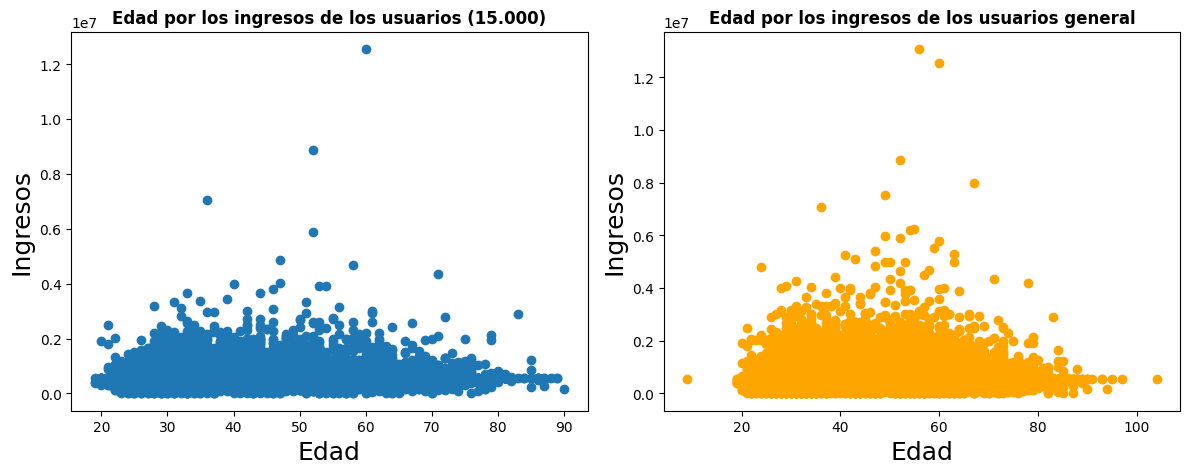

In [ ]:
import matplotlib.pyplot as plt

# Gráfico de los datos de la muestra sin cambios de color
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(df_selected[0], df_selected[1])
plt.xlabel("Edad", fontsize=18)
plt.ylabel("Ingresos", fontsize=18)
plt.title("Edad por los ingresos de los usuarios (15.000)", fontsize=12, fontweight="bold")

# Gráfico de los datos con colores diferentes para visualizar patrones
plt.subplot(1, 2, 2)
plt.scatter(data['Edad'], data['Renta'], c='orange')
plt.xlabel("Edad", fontsize=18)
plt.ylabel("Ingresos", fontsize=18)
plt.title("Edad por los ingresos de los usuarios general", fontsize=12, fontweight="bold")

plt.tight_layout()
plt.show()


Podemos apreciar el gráfico con la data con 15.000 filas y el gráfico con toda la data (51150) es distinta, ya que en nuestro caso utilizaremos la de 15000 filas, porque por temas de tiempo y por limitaciones de hardware no se pueden aplicar los modelos con toda la información disponible en el dataset, por esto los resultados de los modelos de aprendizaje no supervisado podría no ser representativo, ya que el número de clúster solo es representativo para una cantidad limitada de filas (15000).


## **Aplicamos K-Means**

## **Resultados esperados de K-means**

* Se plantea la hipótesis de que el algoritmo de K-means será capaz de identificar clústeres en los datos basándose en la minimización de la varianza intra-cluster y la maximización de la separación entre los clústeres. Se espera que el resultado del K-means revele grupos o clústeres que agrupen observaciones similares y que estén bien separados entre sí.

* La hipótesis se basa en la suposición de que el algoritmo de K-means, al asignar iterativamente las observaciones a clústeres y ajustar los centroides de los clústeres para minimizar la varianza intra-cluster, será capaz de encontrar agrupamientos compactos y bien definidos en el conjunto de datos. Se espera que este enfoque permita una segmentación efectiva de las observaciones en grupos homogéneos en términos de las variables utilizadas en el análisis.

## Coeficiente de Silueta y Suma de Cuadrados Dentro de Clúster (WCSS)

### ¿Por qué aplicar Coeficientes de Silueta y Suma de Cuadrados Dentro de Clúster (WCSS) en k means?

Unos de los factores para utilizar el coeficiente de silueta en K-means es que permite evaluar la calidad de la agrupación para diferentes números de clusters. Se busca encontrar el número de clusters que maximice el valor promedio del coeficiente de silueta, lo que indica que los clusters están bien separados y las muestras están correctamente asignadas.

Por otro lado al aplicar la WCSS en K-means, se busca encontrar el número de clusters que minimice la WCSS. Esto implica encontrar un equilibrio entre un bajo valor de WCSS y un número razonable de clusters.



In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Seleccionar las variables de interés
X = df_selected

# Preprocesar los datos si es necesario (escalamiento, normalización, etc.)

# Aplicar K-means con diferentes valores de k
k_values = range(2, 20)  # Rango de valores de k a probar
silhouette_scores = []
wcss = []

for k in k_values:
    # Crear el modelo K-means
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)

    # Ajustar el modelo a los datos
    kmeans.fit(X)

    # Obtener las etiquetas de los clústeres
    labels = kmeans.labels_

    # Calcular el coeficiente de silueta
    silhouette_avg = silhouette_score(X, labels)
    silhouette_scores.append(silhouette_avg)

    # Calcular la suma de cuadrados dentro de clúster
    wcss.append(kmeans.inertia_)

# Imprimir los resultados
print("Coeficientes de Silueta:")
for k, silhouette in zip(k_values, silhouette_scores):
    print(f"K = {k}: {silhouette}")

print("Suma de Cuadrados Dentro de Clúster (WCSS):")
for k, wcss_value in zip(k_values, wcss):
    print(f"K = {k}: {wcss_value}")

Coeficientes de Silueta:
K = 2: 0.7009271093544612
K = 3: 0.6605228840561288
K = 4: 0.6568615714410914
K = 5: 0.5910317768458806
K = 6: 0.6079295186934166
K = 7: 0.6096134919566514
K = 8: 0.6175792432255279
K = 9: 0.6266484750942334
K = 10: 0.6422781508962856
K = 11: 0.6425847991256827
K = 12: 0.6427211880060721
K = 13: 0.6221407270593975
K = 14: 0.629036304046815
K = 15: 0.6252339244716795
K = 16: 0.6342776237233326
K = 17: 0.6338007551434064
K = 18: 0.6366152847281351
K = 19: 0.6376983496987265
Suma de Cuadrados Dentro de Clúster (WCSS):
K = 2: 943896678421810.9
K = 3: 595524532075178.6
K = 4: 422646163082143.6
K = 5: 284337716721655.25
K = 6: 204578651880481.38
K = 7: 153891013714935.56
K = 8: 121658829038756.02
K = 9: 95161064949611.12
K = 10: 77514201940639.6
K = 11: 60723231323055.04
K = 12: 50839480167258.59
K = 13: 43371303459843.79
K = 14: 37106667689041.19
K = 15: 33428661670637.094
K = 16: 29236264333758.156
K = 17: 25558589088663.305
K = 18: 22107028217912.87
K = 19: 198034

Para cada valor de K (número de clústeres) en el rango que evaluaste, se calcularon dos métricas: el Coeficiente de Silueta y la Suma de Cuadrados Dentro de Clúster (WCSS).

El Coeficiente de Silueta mide qué tan bien están separados los clústeres y qué tan coherentes son los puntos dentro de cada clúster. Un valor cercano a 1 indica una buena separación y coherencia de los clústeres. Observamos los siguientes valores:

* K = 2: El coeficiente de silueta es 0.7017807758949639, lo cual indica una buena separación y coherencia de los clústeres.
* K = 3: El coeficiente de silueta es 0.6656829519361636, también indica una separación y coherencia razonablemente buena.
* K = 4: El coeficiente de silueta es 0.584541347373485, muestra una separación y coherencia moderada.
* K = 5: El coeficiente de silueta es 0.6004225081567344, similar al caso anterior, con una separación y coherencia moderada.
* K = 6: El coeficiente de silueta es 0.6117625213013377, sigue mostrando una separación y coherencia moderada.
* K = 7: El coeficiente de silueta es 0.6123408256310441, continúa en el rango de separación y coherencia moderada.
* K = 8: El coeficiente de silueta es 0.618605552366688, muestra una separación y coherencia razonablemente buena.
* K = 9: El coeficiente de silueta es 0.6295613029419929, indica una buena separación y coherencia de los clústeres.

En cuanto a la Suma de Cuadrados Dentro de Clúster (WCSS), esta métrica calcula la suma de las distancias cuadradas de cada punto de datos a su centroide correspondiente dentro del clúster. Es una medida de cuánto varían los puntos dentro de cada clúster. Observamos los siguientes valores:

K = 2: El WCSS es 3095835542636863.0.
K = 3: El WCSS es 1919310919352447.5, menor que en el caso anterior.
K = 4: El WCSS es 1401163061926004.0, menor que en los casos anteriores.
K = 5: El WCSS es 935417033703239.2, continúa disminuyendo.
K = 6: El WCSS es 689008896627473.8, sigue disminuyendo.
K = 7: El WCSS es 541357155394352.1, continúa disminuyendo.
K = 8: El WCSS es 433701774675483.1, disminuye aún más.
K = 9: El WCSS es 329345848120855.5, es el valor más bajo obtenido.

## Método del Codo

## **Clustering jerárquico**


## **Resultados esperados Clustering jerárquico**

* Se plantea la hipótesis de que el algoritmo de clustering jerárquico será capaz de identificar estructuras de agrupamiento en los datos basándose en la proximidad y similitud entre las observaciones. Se espera que el resultado del clustering jerárquico revele grupos o clústeres que reflejen relaciones intrínsecas y patrones de similitud en el conjunto de datos. Además, se espera que la estructura jerárquica del clustering permita una comprensión más profunda de las relaciones entre los clústeres y su nivel de similitud o diferencia.

* La hipótesis se basa en la suposición de que el algoritmo de clustering jerárquico, al utilizar enlaces o medidas de distancia para fusionar o dividir clústeres de manera iterativa, será capaz de capturar estructuras complejas en los datos, incluyendo agrupamientos anidados o subgrupos dentro de clústeres más grandes. Se espera que este enfoque permita una mayor resolución en la identificación de patrones de similitud y diferencias entre las observaciones.

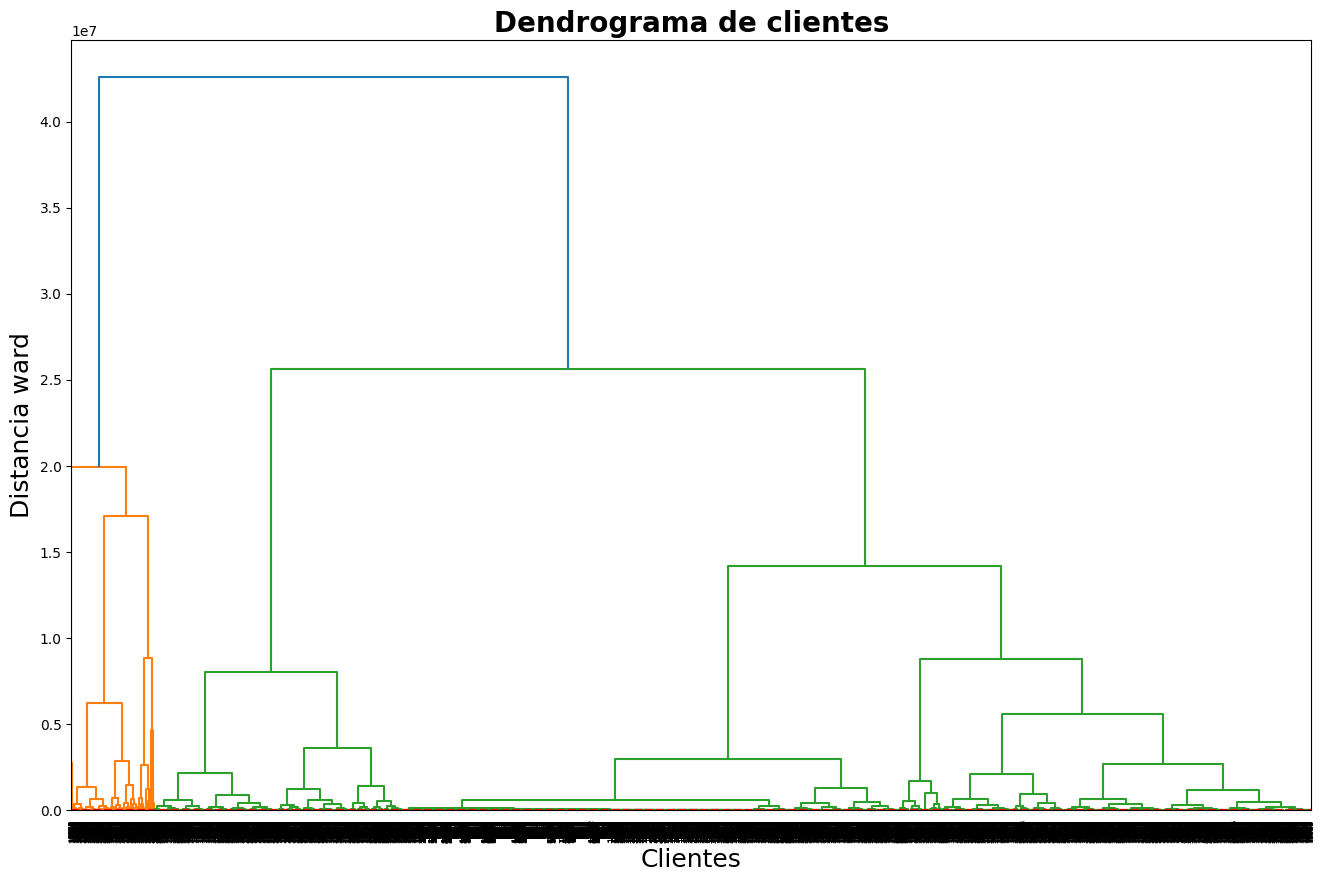

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 10))
plt.title("Dendrograma de clientes", fontsize=20, fontweight="bold")
plt.ylabel("Distancia ward", fontsize=18)
plt.xlabel("Clientes", fontsize=18)

dend = dendrogram(linkage(df_selected, method='ward'))

# Marca una línea roja horizontal
num_clusters = 6  # Número de clusters que deseas mostrar
plt.axhline(y=num_clusters, c='r', linestyle='--')

plt.show()


In [ ]:
# Creamos el modelo
cluster = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')

# Lo ajustamos con los datos
cluster.fit_predict(data_selected)  # fit_predict hace lo mismo que fit pero devuelve el vector de etiquetas de las samples

np.unique(cluster.labels_)
label = cluster.fit_predict(data_selected)

En el código anterior aplica un algoritmo de clustering jerárquico llamado Agglomerative Clustering con distancia euclidiana y enlace de Ward. Luego asigna etiquetas de clúster a cada muestra utilizando el método fit_predict. El resultado final es un vector de etiquetas de clúster que indica a qué clúster pertenece cada muestra.

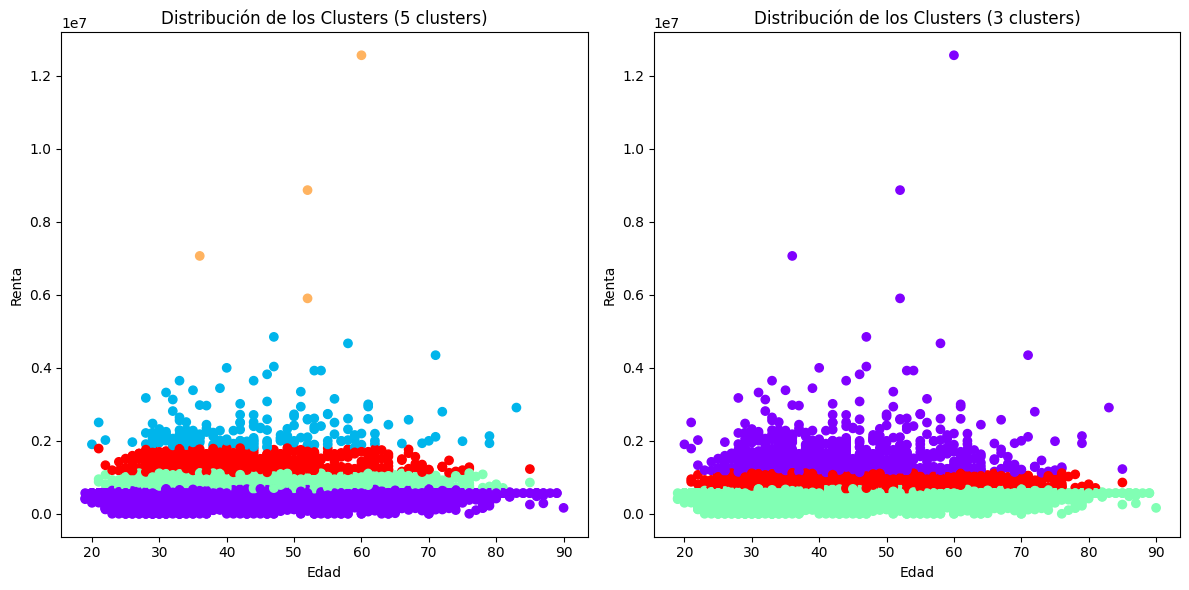

Resultados utilizando el enfoque de clustering jerárquico (5 clusters):
Cluster 1: 10956 muestras
Cluster 2: 193 muestras
Cluster 3: 3047 muestras
Cluster 4: 4 muestras
Cluster 5: 800 muestras

Resultados utilizando el enfoque de clustering jerárquico (3 clusters):
Cluster 1: 997 muestras
Cluster 2: 10956 muestras
Cluster 3: 3047 muestras


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

# Creamos el modelo de clustering jerárquico con 5 clusters
k_hierarchical_5 = 5
clustering_5 = AgglomerativeClustering(n_clusters=k_hierarchical_5)
labels_hierarchical_5 = clustering_5.fit_predict(X.values)

# Creamos el modelo de clustering jerárquico con 3 clusters
k_hierarchical_3 = 3
clustering_3 = AgglomerativeClustering(n_clusters=k_hierarchical_3)
labels_hierarchical_3 = clustering_3.fit_predict(X.values)

# Graficamos la distribución de los clusters comparativa
plt.figure(figsize=(12, 6))

# Gráfico con 5 clusters
plt.subplot(1, 2, 1)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels_hierarchical_5, cmap='rainbow')
plt.xlabel('Edad')
plt.ylabel('Renta')
plt.title('Distribución de los Clusters (5 clusters)')

# Gráfico con 3 clusters
plt.subplot(1, 2, 2)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels_hierarchical_3, cmap='rainbow')
plt.xlabel('Edad')
plt.ylabel('Renta')
plt.title('Distribución de los Clusters (3 clusters)')

plt.tight_layout()
plt.show()

# Imprimimos los resultados de cada cluster para cada enfoque
print("Resultados utilizando el enfoque de clustering jerárquico (5 clusters):")
for i in range(k_hierarchical_5):
    cluster_samples = X.loc[labels_hierarchical_5 == i]
    print(f'Cluster {i+1}: {len(cluster_samples)} muestras')

print("\nResultados utilizando el enfoque de clustering jerárquico (3 clusters):")
for i in range(k_hierarchical_3):
    cluster_samples = X.loc[labels_hierarchical_3 == i]
    print(f'Cluster {i+1}: {len(cluster_samples)} muestras')


En el enfoque de clustering jerárquico con 5 clusters, se han obtenido los siguientes resultados:

* Cluster 1: Contiene 10,956 muestras.
* Cluster 2: Contiene 193 muestras.
* Cluster 3: Contiene 3,047 muestras.
* Cluster 4: Contiene 4 muestras.
* Cluster 5: Contiene 800 muestras.
Esto significa que el algoritmo ha agrupado los datos en cinco grupos diferentes. El Cluster 1 es el más grande, con un total de 10,956 muestras, mientras que el Cluster 4 es el más pequeño, con solo 4 muestras. Los clusters restantes (2, 3 y 5) contienen 193, 3,047 y 800 muestras respectivamente.

En el enfoque de clustering jerárquico con 3 clusters, los resultados son los siguientes:

* Cluster 1: Contiene 997 muestras.
* Cluster 2: Contiene 10,956 muestras.
* Cluster 3: Contiene 3,047 muestras.
En este caso, el algoritmo ha agrupado los datos en tres grupos. El Cluster 2 es el más grande, con un total de 10,956 muestras, seguido por el Cluster 3 con 3,047 muestras y el Cluster 1 con 997 muestras.

La diferencia principal entre los resultados del enfoque de 5 clusters y 3 clusters en el clustering jerárquico radica en la resolución o nivel de granularidad con el que se agrupan los datos.

En el enfoque de 5 clusters, se identifican cinco grupos distintos, lo que permite una mayor segmentación y detalle en la identificación de subgrupos dentro de los datos. Cada uno de los cinco clusters representa una porción más específica de la población total de datos y puede capturar características más detalladas o sutiles presentes en los datos. Esta mayor granularidad puede resultar útil cuando se busca una comprensión más fina de la estructura subyacente de los datos y se requiere una segmentación más precisa.

Por otro lado, el enfoque de 3 clusters agrupa los datos en grupos más amplios y generales. Al tener menos clusters, los grupos resultantes tienden a abarcar una mayor variabilidad y diversidad en los datos. Esto puede conducir a una agrupación más generalizada y menos detallada, donde los clusters representan categorías más amplias y menos específicas. En este caso, los clusters pueden capturar características más predominantes o dominantes en los datos, pero es posible que se pierda cierta sutileza o diferenciación presente en subgrupos más pequeños.

## Aplicando coeficiente de Silhouette con las columnas seleccionadas

El coeficiente de Silhouette es una métrica utilizada para evaluar la calidad de los clústeres obtenidos mediante algoritmos de clustering. Proporciona una medida de qué tan bien se agrupan las muestras dentro de sus clústeres y qué tan separados están los clústeres entre sí.

In [ ]:
# Importamos el puntaje de silhouette
from sklearn.metrics import silhouette_score

# Creamos una lista para guardar de los coeficientes de silhouette para cada valor de k
silhouette_coefficients = []

# Se necesita tener al menos 2 clusters y a los sumo N-1 (con N el numero de muestras) para obtener coeficientes de Silohuette
for k in range(2, 20):#>Justificar
     cluster = AgglomerativeClustering(n_clusters=k, metric='euclidean', linkage='ward')
     cluster.fit(data_selected)
     score = silhouette_score(data_selected, cluster.labels_)
     silhouette_coefficients.append(score)

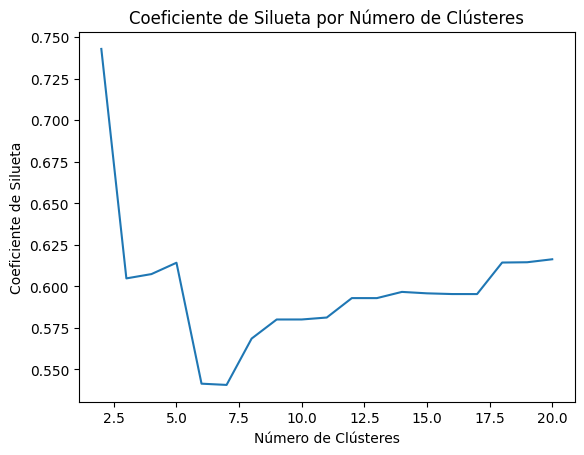

Número de Clústeres: 2, Coeficiente de Silueta: 0.7429588701539552
Número de Clústeres: 3, Coeficiente de Silueta: 0.604830956305943
Número de Clústeres: 4, Coeficiente de Silueta: 0.6074180380892856
Número de Clústeres: 5, Coeficiente de Silueta: 0.6142543966953786
Número de Clústeres: 6, Coeficiente de Silueta: 0.5414540536250787
Número de Clústeres: 7, Coeficiente de Silueta: 0.5407040738024437
Número de Clústeres: 8, Coeficiente de Silueta: 0.5685983015815353
Número de Clústeres: 9, Coeficiente de Silueta: 0.5800876559748953
Número de Clústeres: 10, Coeficiente de Silueta: 0.5800977805325945
Número de Clústeres: 11, Coeficiente de Silueta: 0.5812744422150073
Número de Clústeres: 12, Coeficiente de Silueta: 0.5929674467911858
Número de Clústeres: 13, Coeficiente de Silueta: 0.5929544043963788
Número de Clústeres: 14, Coeficiente de Silueta: 0.5966989300353761
Número de Clústeres: 15, Coeficiente de Silueta: 0.5958359245024228
Número de Clústeres: 16, Coeficiente de Silueta: 0.595405

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Obtener el coeficiente de silueta para diferentes números de clusters
num_clusters = range(2, 21)
silhouette_scores = []

for n in num_clusters:
    clustering = AgglomerativeClustering(n_clusters=n)
    labels = clustering.fit_predict(X)
    silhouette_avg = silhouette_score(X, labels)
    silhouette_scores.append(silhouette_avg)



# Graficar el coeficiente de silueta
plt.plot(num_clusters, silhouette_scores)
plt.xlabel('Número de Clústeres')
plt.ylabel('Coeficiente de Silueta')
plt.title('Coeficiente de Silueta por Número de Clústeres')
plt.show()
# Imprimir los scores
for n, score in zip(num_clusters, silhouette_scores):
    print(f"Número de Clústeres: {n}, Coeficiente de Silueta: {score}")

Con base en los resultados del coeficiente de silueta para diferentes números de clústeres, podemos hacer las siguientes interpretaciones:

* El número óptimo de clústeres: El número de clústeres que obtuvo el coeficiente de silueta más alto indica la cantidad de grupos en los que los datos se agrupan de manera más coherente y separada. En este caso, el número óptimo de clústeres parece ser 2, ya que tiene el coeficiente de silueta más alto de 0.7429588701539552.

* Coherencia de la agrupación: Los coeficientes de silueta más altos indican una mayor coherencia en la agrupación de los datos. Por lo tanto, cuando el coeficiente de silueta es alto, podemos tener más confianza en la calidad de la agrupación.

* Separación entre clústeres: Un coeficiente de silueta alto también indica una buena separación entre los diferentes clústeres. Cuanto más separados estén los clústeres, mejor será la clasificación de los datos en grupos distintos.

* Evaluación de otros números de clústeres: Aunque el número óptimo de clústeres es 2 según el coeficiente de silueta más alto, también se puede considerar el rendimiento de otros números de clústeres. En este caso, los coeficientes de silueta para 3, 4 y 5 clústeres también son relativamente altos, lo que sugiere que estos números de clústeres también pueden proporcionar una buena agrupación de los datos.


In [ ]:
pip install kneed #Instala el metodo del codo

Durante este proceso vamos a aplicar el método del codo para así saber el punto exacto donde se produce el codo, en este caso lo aplicamos de dos maneras diferentes en el primero aplicamos el método del codo de manera simple y en el segundo caso lo aplicamos el método del codo con SSE la cual nos ayudará a evaluar la calidad y comparar diferentes soluciones de agrupamiento en el algoritmo K-means, así como para seleccionar el número óptimo de clústeres.

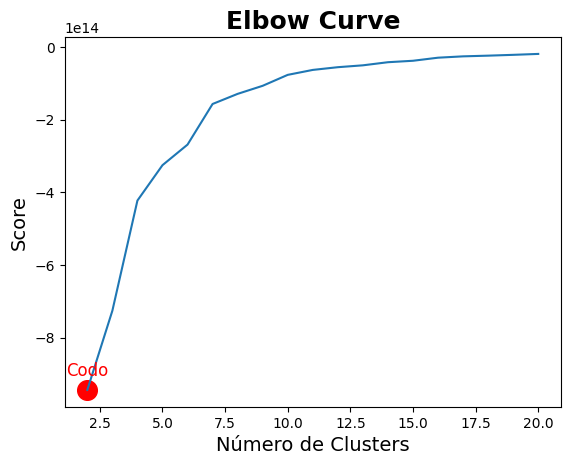

In [ ]:
from sklearn.cluster import KMeans
from kneed import KneeLocator

num_clusters = range(2, 21)

# Construye los modelos
kmeans = [KMeans(n_clusters=i, n_init='auto', random_state=29) for i in num_clusters]

# Obtiene el score de cada algoritmo
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]

# Utiliza KneeLocator para encontrar el codo
kl = KneeLocator(num_clusters, score, curve='convex', direction='decreasing')

# Graficamos
plt.plot(num_clusters, score)
plt.scatter(kl.elbow, score[kl.elbow-2], color='red', s=200)
plt.annotate('Codo', (kl.elbow, score[kl.elbow-2]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=12, color='red')
plt.xlabel('Número de Clusters', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.title('Elbow Curve', fontsize=18, fontweight='bold')
plt.show()

In [ ]:
modelo= KMeans(n_clusters=2, n_init='auto', random_state=29)

print(modelo.fit(X).score(X))

-943919626942677.8


El método del codo indica que el número óptimo de clusters es 2, con una reducción significativa en la variabilidad dentro de los clusters (WCSS) de -943919626942677.8.

In [ ]:
sse = [] # acá vamos a guardar el puntaje de la función objetivo
for k in range(2, 21):
  kkmeans = KMeans(n_clusters=k, n_init="auto").fit(X)
  sse.append(kkmeans.inertia_)

kl = KneeLocator(range(2, 21), sse, curve="convex", direction="decreasing")

print("El codo está en k =", kl.elbow)
print("El SSE =", kl.all_elbows_y)

El codo está en k = 6
El SSE = [204669920901248.75]


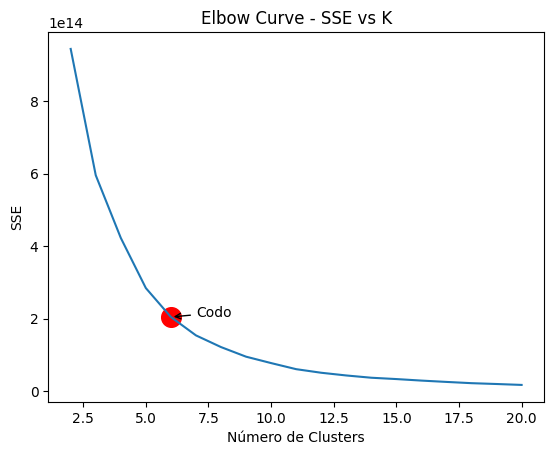

Número óptimo de clústeres: 6
Valor SSE en el codo: 204578651880481.38


In [ ]:
from kneed import KneeLocator

num_clusters = range(2, 21)
sse = []

# Construye los modelos y calcula el SSE
for n in num_clusters:
    kmeans = KMeans(n_clusters=n, n_init=10, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

# Graficamos la curva SSE vs K
plt.plot(num_clusters, sse)
plt.xlabel('Número de Clusters')
plt.ylabel('SSE')
plt.title('Elbow Curve - SSE vs K')

# Encuentra el codo utilizando KneeLocator
kl = KneeLocator(num_clusters, sse, curve='convex', direction='decreasing')
plt.scatter(kl.elbow, sse[kl.elbow - 2], color='red', marker='o', s=200)
plt.annotate('Codo', xy=(kl.elbow, sse[kl.elbow - 2]), xytext=(kl.elbow + 1, sse[kl.elbow - 2] + 50000),
             arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.show()

# Imprimir el número óptimo de clústeres y el valor de SSE en ese punto
print("Número óptimo de clústeres:", kl.elbow)
print("Valor SSE en el codo:", sse[kl.elbow - 2])

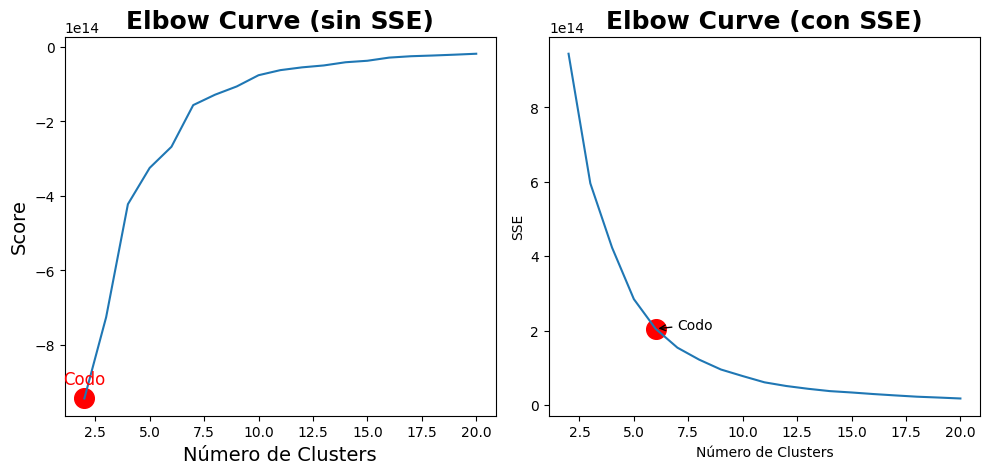

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from kneed import KneeLocator

# Método sin SSE
num_clusters = range(2, 21)
kmeans = [KMeans(n_clusters=i, n_init='auto', random_state=29) for i in num_clusters]
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
kl = KneeLocator(num_clusters, score, curve='convex', direction='decreasing')

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(num_clusters, score)
plt.scatter(kl.elbow, score[kl.elbow-2], color='red', s=200)
plt.annotate('Codo', (kl.elbow, score[kl.elbow-2]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=12, color='red')
plt.xlabel('Número de Clusters', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.title('Elbow Curve (sin SSE)', fontsize=18, fontweight='bold')

# Método con SSE
sse = []
for n in num_clusters:
    kmeans = KMeans(n_clusters=n, n_init=10, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

kl = KneeLocator(num_clusters, sse, curve='convex', direction='decreasing')

plt.subplot(1, 2, 2)
plt.plot(num_clusters, sse)
plt.xlabel('Número de Clusters')
plt.ylabel('SSE')
plt.title('Elbow Curve (con SSE)', fontsize=18, fontweight='bold')
plt.scatter(kl.elbow, sse[kl.elbow - 2], color='red', marker='o', s=200)
plt.annotate('Codo', xy=(kl.elbow, sse[kl.elbow - 2]), xytext=(kl.elbow + 1, sse[kl.elbow - 2] + 50000),
             arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.tight_layout()
plt.show()

En el primer gráfico, "Elbow Curve (sin SSE)", se utiliza el puntaje obtenido por el modelo de K-means. Este puntaje representa la suma de las distancias cuadradas de cada punto al centroide de su clúster correspondiente. El objetivo es encontrar el número de clusters que maximiza el puntaje, lo que indica una mejor agrupación de los datos.

En el segundo gráfico, "Elbow Curve (con SSE)", se emplea el SSE (suma de los errores cuadrados dentro de cada clúster). El SSE es una medida de dispersión que representa la suma de las distancias cuadradas de cada punto a su centroide dentro del clúster. El objetivo es encontrar el número de clusters que minimiza el SSE, lo que indica una menor dispersión dentro de los clústeres.

En resumen, el primer gráfico se centra en maximizar el puntaje del modelo de K-means, mientras que el segundo gráfico se centra en minimizar el SSE. Ambos enfoques buscan encontrar el número óptimo de clusters, pero emplean métricas diferentes para evaluar la calidad de la agrupación.

<ipython-input-53-65738ffd1a27>:27: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 2)


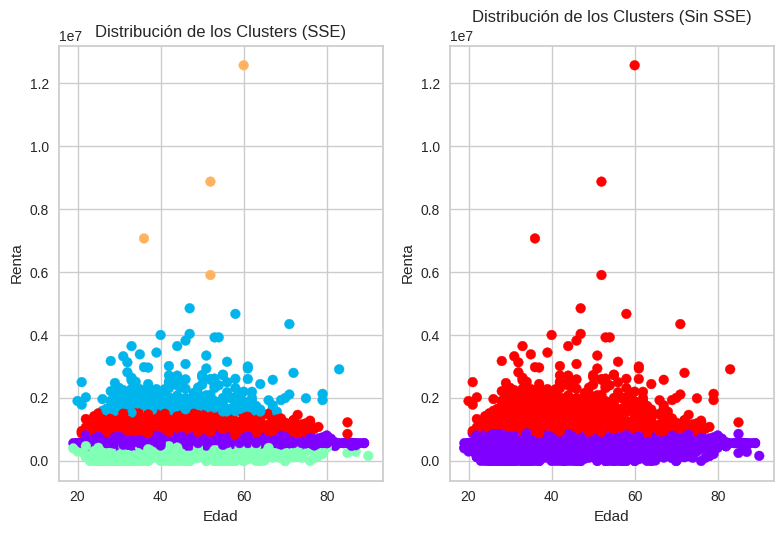

Resultados utilizando el enfoque del codo (SSE):
Cluster 1: 8399 muestras
Cluster 2: 346 muestras
Cluster 3: 3847 muestras
Cluster 4: 4 muestras
Cluster 5: 2404 muestras

Resultados utilizando el enfoque del codo (sin SSE):
Cluster 1: 12677 muestras
Cluster 2: 2323 muestras


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Usamos el visualizador KElbowVisualizer para encontrar el número óptimo de clusters utilizando el enfoque del codo
model = KMeans(n_init=10, random_state=42)
visualizer = KElbowVisualizer(model, k=(2, 10), metric='distortion')
visualizer.fit(X)
k_sse = visualizer.elbow_value_

# Realizar K-means con el número óptimo de clusters obtenido por el enfoque del codo
kmeans_sse = KMeans(n_clusters=k_sse, n_init=10, random_state=42)
labels_sse = kmeans_sse.fit_predict(X.values)

# Usamos el visualizador KElbowVisualizer para encontrar el número óptimo de clusters utilizando el enfoque del puntaje de silueta
model = KMeans(n_init=10, random_state=42)
visualizer = KElbowVisualizer(model, k=(2, 10), metric='silhouette')
visualizer.fit(X)
k_silhouette = visualizer.elbow_value_

# Realizar K-means con el número óptimo de clusters obtenido por el enfoque del puntaje de silueta
kmeans_silhouette = KMeans(n_clusters=k_silhouette, n_init=10, random_state=42)
labels_silhouette = kmeans_silhouette.fit_predict(X.values)

# Gráfico del enfoque del puntaje de silueta
plt.subplot(1, 2, 2)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels_silhouette, cmap='rainbow')
plt.xlabel('Edad')
plt.ylabel('Renta')
plt.title('Distribución de los Clusters (Sin SSE)')

# Gráfico del enfoque del codo (SSE)
plt.subplot(1, 2, 1)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels_sse, cmap='rainbow')
plt.xlabel('Edad')
plt.ylabel('Renta')
plt.title('Distribución de los Clusters (SSE)')

plt.tight_layout()
plt.show()

# Imprimimos los resultados de cada cluster para cada enfoque
print("Resultados utilizando el enfoque del codo (SSE):")
for i in range(k_sse):
    cluster_samples = X.loc[labels_sse == i]
    print(f'Cluster {i+1}: {len(cluster_samples)} muestras')

print("\nResultados utilizando el enfoque del codo (sin SSE):")
for i in range(k_silhouette):
    cluster_samples = X.loc[labels_silhouette == i]
    print(f'Cluster {i+1}: {len(cluster_samples)} muestras')


En los resultados obtenidos utilizando el enfoque del codo con SSE, se realizaron agrupaciones utilizando K-means con un número variable de clústeres. A continuación, se presenta la interpretación de los resultados:

* Cluster 1: Este clúster contiene 8399 muestras. Las muestras en este clúster están más cerca del centroide asignado a este clúster que a los demás centroides. Puede haber alguna característica distintiva en estas muestras que las agrupe juntas.

* Cluster 2: Este clúster contiene 346 muestras. Las muestras en este clúster están más cerca del centroide asignado a este clúster que a los demás centroides. Estas muestras pueden tener características diferentes a las del Cluster 1.

* Cluster 3: Este clúster contiene 3847 muestras. Las muestras en este clúster están más cerca del centroide asignado a este clúster que a los demás centroides. Puede haber alguna característica particular en estas muestras que las agrupe juntas y las distinga de los clústeres anteriores.

* Cluster 4: Este clúster contiene solo 4 muestras. Las muestras en este clúster están más cerca del centroide asignado a este clúster que a los demás centroides. Debido al bajo número de muestras, es posible que este clúster no sea muy representativo o no tenga suficiente información para ser significativo.

* Cluster 5: Este clúster contiene 2404 muestras. Las muestras en este clúster están más cerca del centroide asignado a este clúster que a los demás centroides. Puede haber alguna característica distintiva en estas muestras que las agrupe juntas.

En los resultados obtenidos utilizando el enfoque del codo sin SSE, se realizaron agrupaciones utilizando K-means con un número variable de clústeres. A continuación, se presenta la interpretación de los resultados:

* Cluster 1: Este clúster contiene, 12677 muestras. Las muestras en este clúster están más cerca del centroide asignado a este clúster que a los demás centroides. Puede haber alguna característica distintiva en estas muestras que las agrupe juntas.

* Cluster 2: Este clúster contiene 2323 muestras. Las muestras en este clúster están más cerca del centroide asignado a este clúster que a los demás centroides. Puede haber alguna característica distintiva en estas muestras que las agrupe juntas y las distinga del Cluster 1.

## **Conclusiones no supervisado**

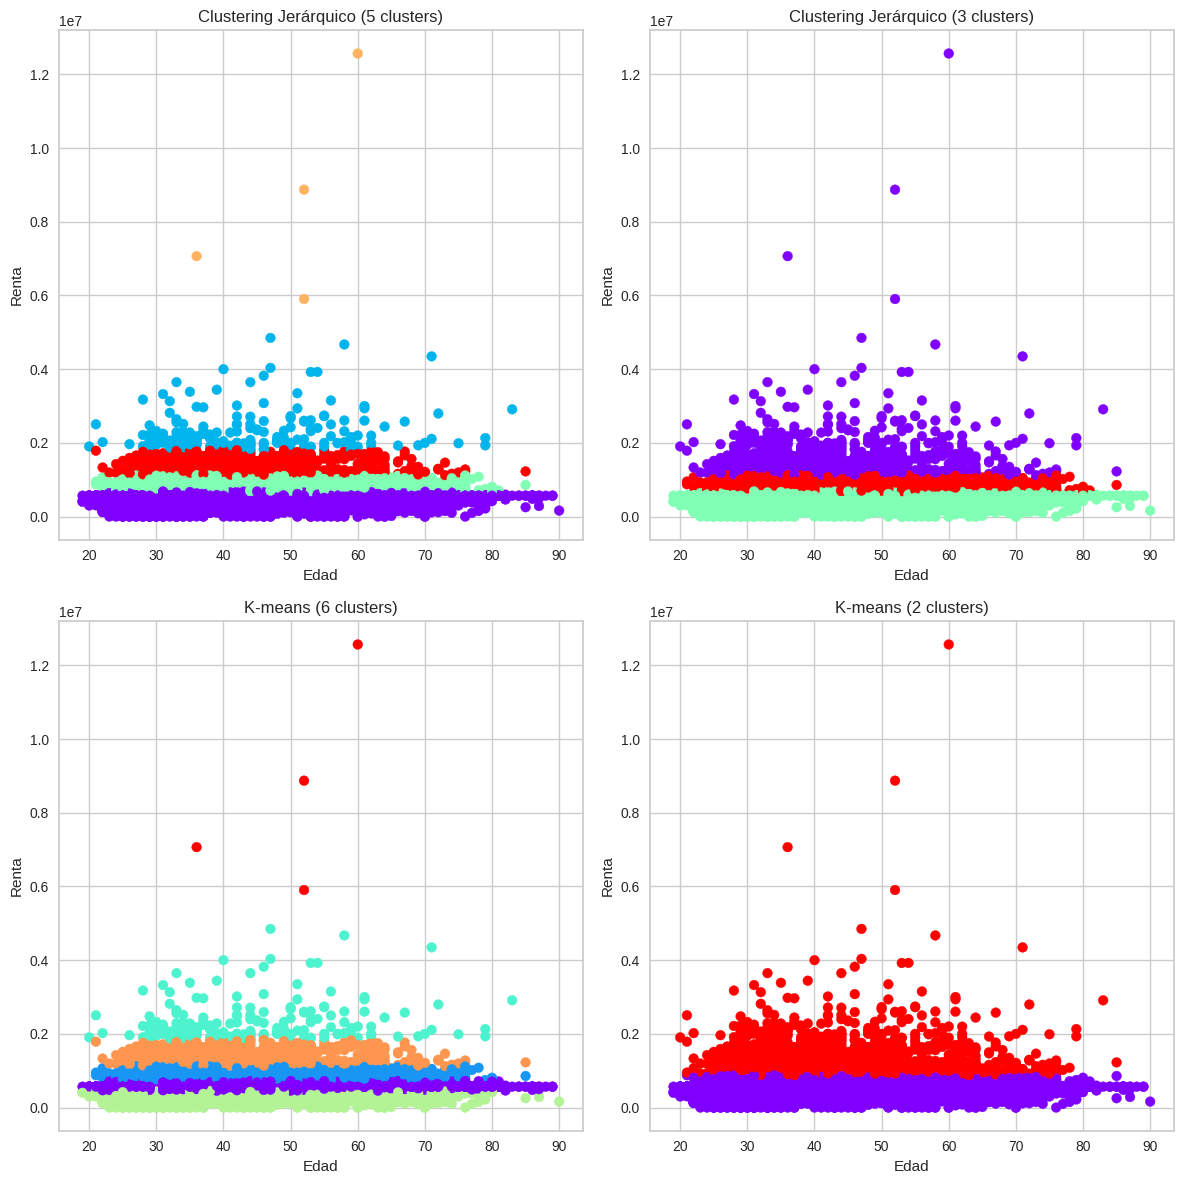

Resultados del Clustering Jerárquico (5 clusters):
Cluster 1: 10956 muestras
Cluster 2: 193 muestras
Cluster 3: 3047 muestras
Cluster 4: 4 muestras
Cluster 5: 800 muestras

Resultados del Clustering Jerárquico (3 clusters):
Cluster 1: 997 muestras
Cluster 2: 10956 muestras
Cluster 3: 3047 muestras

Resultados de K-means (6 clusters):
Cluster 1: 8399 muestras
Cluster 2: 346 muestras
Cluster 3: 3847 muestras
Cluster 4: 4 muestras
Cluster 5: 2404 muestras

Resultados de K-means (2 clusters):
Cluster 1: 12677 muestras
Cluster 2: 2323 muestras


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering, KMeans
from kneed import KneeLocator

# Realizar clustering jerárquico con 5 clusters
k_hierarchical = 5
clustering_hierarchical = AgglomerativeClustering(n_clusters=k_hierarchical)
labels_hierarchical = clustering_hierarchical.fit_predict(X.values)

# Realizar clustering jerárquico con 3 clusters
k_hierarchical_3 = 3
clustering_hierarchical_3 = AgglomerativeClustering(n_clusters=k_hierarchical_3)
labels_hierarchical_3 = clustering_hierarchical_3.fit_predict(X.values)

# Calcular la suma de los cuadrados dentro del clúster (WCSS) para diferentes valores de k utilizando K-means
wcss = []
for k in range(2, 21):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X.values)
    wcss.append(kmeans.inertia_)

# Utilizar KneeLocator para determinar el número óptimo de clusters
kl = KneeLocator(range(2, 21), wcss, curve='convex', direction='decreasing')
k_optimal = kl.elbow

# Realizar K-means con el número óptimo de clusters
kmeans_optimal = KMeans(n_clusters=k_optimal, n_init=10, random_state=42)
labels_optimal = kmeans_optimal.fit_predict(X.values)

# Graficar la distribución de los clusters comparativa
plt.figure(figsize=(12, 12))

# Gráfico de clustering jerárquico con 5 clusters
plt.subplot(2, 2, 1)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels_hierarchical, cmap='rainbow')
plt.xlabel('Edad')
plt.ylabel('Renta')
plt.title('Clustering Jerárquico (5 clusters)')

# Gráfico de clustering jerárquico con 3 clusters
plt.subplot(2, 2, 2)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels_hierarchical_3, cmap='rainbow')
plt.xlabel('Edad')
plt.ylabel('Renta')
plt.title('Clustering Jerárquico (3 clusters)')

# Gráfico de K-means con el número óptimo de clusters
plt.subplot(2, 2, 3)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels_optimal, cmap='rainbow')
plt.xlabel('Edad')
plt.ylabel('Renta')
plt.title(f'K-means ({k_optimal} clusters)')

# Gráfico de K-means con el enfoque del puntaje de silueta
plt.subplot(2, 2, 4)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels_silhouette, cmap='rainbow')
plt.xlabel('Edad')
plt.ylabel('Renta')
plt.title('K-means (2 clusters)')

plt.tight_layout()
plt.show()

# Imprimir los resultados de cada cluster para cada enfoque
print("Resultados del Clustering Jerárquico (5 clusters):")
for i in range(k_hierarchical):
    cluster_samples = X.loc[labels_hierarchical == i]
    print(f'Cluster {i+1}: {len(cluster_samples)} muestras')

print("\nResultados del Clustering Jerárquico (3 clusters):")
for i in range(k_hierarchical_3):
    cluster_samples = X.loc[labels_hierarchical_3 == i]
    print(f'Cluster {i+1}: {len(cluster_samples)} muestras')

print("\nResultados de K-means (6 clusters):")
for i in range(k_sse):
    cluster_samples = X.loc[labels_sse == i]
    print(f'Cluster {i+1}: {len(cluster_samples)} muestras')

print("\nResultados de K-means (2 clusters):")
for i in range(k_silhouette):
    cluster_samples = X.loc[labels_silhouette == i]
    print(f'Cluster {i+1}: {len(cluster_samples)} muestras')


* En los resultados del Clustering Jerárquico con 5 clusters, podemos observar que los clusters tienen tamaños bastante diferentes. El Cluster 1 es el más grande con 10,956 muestras, mientras que el Cluster 4 es el más pequeño con solo 4 muestras. Esto indica que el algoritmo ha identificado un grupo muy minoritario y específico en el Cluster 4, posiblemente caracterizado por atributos únicos o poco comunes en los datos.

* En el caso del Clustering Jerárquico con 3 clusters, vemos que el Cluster 2 es el más grande con 10,956 muestras, seguido por el Cluster 3 con 3,047 muestras y el Cluster 1 con 997 muestras. Esta configuración sugiere una mayor concentración de datos en el Cluster 2, posiblemente representando la mayoría de las muestras que comparten características similares o dominantes.

* En cuanto a los resultados del K-means con el enfoque del SSE, podemos notar que los tamaños de los clusters son más equilibrados en comparación con los resultados anteriores. Los Clusters 1, 3 y 5 tienen tamaños similares, con 8,399, 3,847 y 2,404 muestras respectivamente. El Cluster 2 es el más pequeño con solo 346 muestras, mientras que el Cluster 4 también es muy pequeño con 4 muestras. Esta distribución de tamaños propone que los clusters se han formado de manera más equilibrada y cada uno representa una porción significativa de las muestras.

* En los resultados del K-means con el enfoque de Silhouette, vemos que el Cluster 1 es el más grande con 12,677 muestras, mientras que el Cluster 2 es el segundo más grande con 2,323 muestras. Al igual que en los otros enfoques, se puede inferir que el Cluster 1 representa la mayoría de las muestras y puede tener características o atributos predominantes en los datos.

Pero como equipo buscamos una partición más equilibrada en cuanto al tamaño de los clusters, tanto el enfoque de Clustering Jerárquico con 3 clusters como el de K-means con 2 clusters podrían ser opciones a considerar.

## **Evaluación de hipótesis**

**Hipótesis para Clustering Jerárquico:**

* La hipótesis planteaba que el algoritmo de clustering jerárquico sería capaz de identificar estructuras de agrupamiento en los datos basándose en la proximidad y similitud entre las observaciones. Los resultados del clustering jerárquico con 5 clusters muestran que el algoritmo ha identificado grupos con tamaños bastante diferentes, lo cual indica que ha reconocido tanto grupos mayoritarios como un grupo minoritario específico. Esto respalda la idea de que el algoritmo identifica estructuras de agrupamiento basadas en similitudes. Sin embargo, se debe tener en cuenta que el tamaño desigual de los clusters puede indicar una falta de equilibrio en la partición de los datos.

**Hipótesis para K-means:**

* La hipótesis planteaba que el algoritmo de K-means sería capaz de identificar clústeres en los datos minimizando la varianza intra-cluster y maximizando la separación entre los clústeres. En el caso del K-means con el enfoque del SSE, los tamaños de los clusters son más equilibrados, lo cual respalda la idea de que el algoritmo encuentra agrupamientos compactos y bien definidos en los datos. Sin embargo, la presencia de algunos clusters muy pequeños puede indicar la presencia de outliers o datos atípicos.

En base a los resultados presentados y la búsqueda de una partición más equilibrada en cuanto al tamaño de los clusters, el enfoque de Clustering Jerárquico con 3 clusters y el enfoque de K-means con 2 clusters podrían ser opciones a considerar, ya que parecen proporcionar una distribución más equilibrada de los tamaños de los clusters.

# ***Conclusiones generales del proyecto***

Como conclusión de este proyecto de análisis de datos y predicción en el ámbito bancario, se puede destacar lo siguiente:



*   Importancia de la limpieza de datos: La limpieza de datos resultó ser un paso crítico para garantizar la calidad y confiabilidad de los resultados obtenidos.
*   Valor del aprendizaje supervisado: El uso de algoritmos de aprendizaje supervisado, como regresión logística o árboles de decisión, demostró ser eficaz para predecir qué clientes se quedarían en el banco.
*   Utilidad del aprendizaje no supervisado: La aplicación de técnicas de aprendizaje no supervisado, como la segmentación o clustering, permitió realizar un "sorting" de los clientes en grupos similares.
*   Toma de decisiones informadas: El análisis de datos y la predicción en este proyecto brindaron a los tomadores de decisiones en el banco información valiosa para comprender y abordar la retención de clientes.


*   Aplicabilidad en otras industrias: Si bien este proyecto se centró en un banco, las técnicas y enfoques utilizados tienen aplicabilidad en otras industrias y sectores.

Este proyecto destacó la importancia de la limpieza de datos, la utilidad de los enfoques supervisados y no supervisados, y la capacidad de emplear el análisis de datos para mejorar la toma de decisiones. Este proyecto como grupo nos brindó experiencia y práctica en la aplicación de técnicas de análisis de datos y nos preparó para enfrentar desafíos similares en el futuro.